Рассмотрим Optimal Brain Damage для задачи тематического моделирования. Напомним, перед нами ставится задача максимизации: 
$$
L = \sum_{d,w} n_{dw} \log \sum_{t} \phi_{wt} \theta_{td}
$$
У нас есть какое-то решение $\phi$  и $\theta$, мы хотим его сделать более разреженным, сохранив структуру и несильно испортив правдоподобие, используя метод OBD. 

Далее будем использовать стандартные обозначения ARTM ($p_{tdw}$, $n_{wt}$, $n_t$ и так далее).

### Математическая составляющая
####Зануление $\Phi$
 Для каждого $w$, $t$ определелим изменение правдоподобия при занулении $\phi_{wt}$:
$$
\Delta_1 L = \sum_{d} n_{dw} \left( \log \sum_{s\colon s\neq t} \phi_{ws} \theta_{sd} - \log \sum_{s} \phi_{ws} \theta_{sd} \right)=
\sum_{d} n_{dw} \log \frac{\sum_{s\colon s\neq t} \phi_{ws} \theta_{sd} }{\sum_{s} \phi_{ws} \theta_{sd}}=
$$
$$
=
\sum_{d} n_{dw} \log \left( 1 - \frac{\phi_{wt} \theta_{td} }{\sum_{s} \phi_{ws} \theta_{sd}} \right) =
\sum_{d} n_{dw} \log(1 - p_{tdw}) \approx - \sum_{d} n_{dw} p_{tdw} = - n_{wt}
$$
Таким образом, если мы хотим занулять параметры модели для разреживания, кажется, что нужно занулять параметры с наименьшим значением $n_{wt}$. Однако, здесь опускается один важный момент: когда мы разреживаем модель и зануляем какой-то $\phi_{wt}$, вероятность всех остальных слов в теме увеличивается, а это увеличивает правдоподобие. Оценим эффект увеличения логарифма правдоподобия при занулении $\phi_{wt}$:
$$
\Delta_2 L = \sum_{d, u \neq w} n_{du} \left( \log \left( \sum_{s \neq t} \phi_{us} \theta_{sd}  + \frac{\phi_{us}}{1 - \phi_{wt}} \theta_{td} \right) - \log \sum_{s} \phi_{us} \theta_{sd} \right)=
$$
$$
=\sum_{d, u \neq w} n_{du} \left( \log \left( \sum_{s} \phi_{us} \theta_{sd}  + \frac{\phi_{wt}}{1 - \phi_{wt}} \phi_{us} \theta_{td} \right) - \log \sum_{s} \phi_{us} \theta_{sd} \right)=
$$
$$
=\sum_{d, u \neq w} n_{du} \log \left(1 + \frac{\phi_{wt}}{1 - \phi_{wt}} \frac{\phi_{us} \theta_{td} }{\sum_{s} \phi_{us} \theta_{sd}}\right) = \sum_{d, u \neq w} n_{du}  \log \left(1 + \frac{\phi_{wt}}{1 - \phi_{wt}} p_{tdu}\right) \approx
$$
$$
\approx \sum_{d, u \neq w} n_{du} \frac{\phi_{wt}}{1 - \phi_{wt}} p_{tdu} = \frac{\phi_{wt}}{1 - \phi_{wt}} \sum_{d, u \neq w} n_{du} p_{tdu} = \frac{\phi_{wt}}{1 - \phi_{wt}} \left( n_t - n_{wt}\right) = 
$$
$$
=\frac{\phi_{wt} n_t}{1 - \phi_{wt}} \left( 1 - \frac{n_{wt}}{n_t}\right) \approx n_{wt}
$$
В первом приближении за счёт увеличения $\phi_{ut}$ при $u \neq w$ логарифм правдоподобия увеличится на $n_{wt}$. То есть суммарно в первом приближении правдоподобие не изменится. У данной проблемы есть два решения. Во-первых, мы можем честно посчитать $\Delta_1 L $ и $\Delta_2 L $ на Е-шаге и использовать их сумму (их можно эффективно быстро подсчитать, однако есть минус, что есть логарифмы, а это сказывается на скорости выполнения). Второй способ - разложить изменение не до первого члена в ряде тейлора, а до второго.
$$
\Delta_1 L = \sum_{d} n_{dw} \log(1 - p_{tdw}) \approx = - \sum_{d} n_{dw} \left( p_{tdw} + \frac12 p_{tdw}^2\right) = -n_{wt} -  \frac12 \sum_{d} n_{dw} p_{tdw}^2
$$
$$
\Delta_2 L = \sum_{d, u \neq w} n_{du}  \log \left(1 + \frac{\phi_{wt}}{1 - \phi_{wt}} p_{tdu}\right) \approx
\sum_{d, u \neq w} n_{du}  \left(\frac{\phi_{wt}}{1 - \phi_{wt}} p_{tdu} - \frac12\left( \frac{\phi_{wt}}{1 - \phi_{wt}}  \right)^2 p_{tdu}^2\right) =
$$
$$
= \frac{\phi_{wt}}{1 - \phi_{wt}}  \left( n_t - n_{wt}\right) - \frac12\left( \frac{\phi_{wt}}{1 - \phi_{wt}}  \right)^2 \sum_{d, u \neq w} n_{du} p_{tdu}^2 \approx n_{wt} - \frac12\left( \frac{\phi_{wt}}{1 - \phi_{wt}}  \right)^2 \sum_{d, u \neq w} n_{du} p_{tdu}^2
$$
Итак,
$$
\Delta L = \Delta_1 L + \Delta_2 L \approx -  \frac12 \sum_{d} n_{dw} p_{tdw}^2 - \frac12\left( \frac{\phi_{wt}}{1 - \phi_{wt}}  \right)^2 \sum_{d, u \neq w} n_{du} p_{tdu}^2
$$
Это тоже можно эффективно подсчитать на E шаге, только теперь не будет логарифмов, а значит считаться будет быстрее.
####Зануление $\Theta$
Аналогично доказывается, что
$$
\Delta L = \sum_w n_{dw} \log \left( 1 - p_{tdw}\right) - n_d \log(1 - \theta_{td})
$$
###Как это можно использовать
1. Для разреживания модели на Е шаге. Можно разреживать уже имеющееся хорошее решение, можно делать по ходу итераций.
2. Когда мы хотим выбирать характерные слова из темы, можно выбирать не по $\phi_{wt}$, а по $\Delta_1 L + \Delta_2 L$.

#Питоновская реализация EM алгоритма

Полезно проделать, чтобы разобраться в numpy и в том, как эффективно писать на питоне.

In [57]:
import numpy as np
import scipy
import scipy.sparse
from sklearn.datasets import fetch_20newsgroups
import gensim
from collections import Counter
from collections import deque
import heapq
import nltk
from nltk.corpus import stopwords
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline

Нужно скачать некоторые коллекции данных и установить библиотеки (nltk, gensim)

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/tylorn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
english_stopwords = set(stopwords.words('english'))

## Исходники, можно пропускать

In [4]:
def trivial_p_dwt_processor(p_dwt):
    pass

def create_frac_of_max_p_dwt_processor(frac_size):
    def fun(p_dwt):
        maximums = np.max(p_dwt, axis=1)
        p_dwt[p_dwt < frac_size * maximums[:, np.newaxis]] = 0.
        p_dwt /= (np.sum(p_dwt, axis=1)[:, np.newaxis] + 1e-10)
    return fun

In [525]:
def perform_e_step_update(freq_matrix, docptr, phi_matrix, theta_matrix, params):
    block_size = params.get('block_size', 1)
    p_dwt_processor = params.get('p_dwt_processor', lambda x: None)
    
    D, W = freq_matrix.shape
    T = phi_matrix.shape[0]
    n_wt, n_dt = np.zeros((W, T)), np.zeros((D, T))
    transposed_phi_matrix = np.transpose(phi_matrix)
    
    indices = freq_matrix.indices
    indptr = freq_matrix.indptr
    data = freq_matrix.data
    
    for block_num in xrange((D + block_size - 1) / block_size):
        block_start = block_num * block_size
        block_finish = min(D, block_start + block_size)
        ind_start, ind_finish = indptr[block_start], indptr[block_finish]
        
        datas = data[ind_start:ind_finish]
        words = indices[ind_start:ind_finish]
        docs = docptr[ind_start:ind_finish]
        
        p_dwt = transposed_phi_matrix[words] * theta_matrix[docs, :]
        p_dwt /= (np.sum(p_dwt, axis=1)[:, np.newaxis] + 1e-10)
        p_dwt_processor(p_dwt)
        p_dwt *= datas[:, np.newaxis]
        
        for doc_num in xrange(block_start, block_finish):
            doc_start, doc_finish = indptr[doc_num], indptr[doc_num + 1]
            doc_p_dwt = p_dwt[(doc_start - ind_start):(doc_finish - ind_start), :]
            n_dt[doc_num, :] += np.sum(doc_p_dwt, axis=0)
            n_wt[indices[doc_start:doc_finish], :] += doc_p_dwt

    return n_wt, n_dt

In [6]:
def perform_obg_e_step_update(freq_matrix, docptr, phi_matrix, theta_matrix, params):
    block_size = params.get('block_size', 1)
    percentile = params.get('percentile', 99)
    min_bound = params.get('min_bound', -1000)
    max_bound = params.get('max_bound', np.log(1e-20) + 1.)
    return_gamma = params.get('return_gamma', False)
    theta_obg = params.get('theta_obg', False)
    phi_obg = params.get('phi_obg', True)
    phi_k_size = params.get('phi_k_size', 1)
    theta_k_size = params.get('theta_k_size', 1)
    theta_percentile = params.get('theta_percentile', percentile)
    min_theta_bound = params.get('min_bound', -1000)
    
    D, W = freq_matrix.shape
    T = phi_matrix.shape[0]
    n_wt, n_dt = np.zeros((W, T)), np.zeros((D, T))
    if phi_obg:
        alpha_wt, beta_wt = np.zeros((W, T)), np.zeros((W, T))
    if theta_obg:
        alpha_dt = np.zeros((D, T))
    transposed_phi_matrix = np.transpose(phi_matrix)
    
    indices = freq_matrix.indices
    indptr = freq_matrix.indptr
    data = freq_matrix.data
    
    for block_num in xrange((D + block_size - 1) / block_size):
        block_start = block_num * block_size
        block_finish = min(D, block_start + block_size)
        ind_start, ind_finish = indptr[block_start], indptr[block_finish]
        
        datas = data[ind_start:ind_finish]
        words = indices[ind_start:ind_finish]
        docs = docptr[ind_start:ind_finish]
        
        p_dwt = transposed_phi_matrix[words] * theta_matrix[docs, :]
        p_dwt /= (np.sum(p_dwt, axis=1)[:, np.newaxis] + 1e-20)
        
        alpha_dwt = np.log(1. - p_dwt) * datas[:, np.newaxis]
        beta_dwt = np.log(1. + p_dwt) * datas[:, np.newaxis]
        n_dwt = p_dwt * datas[:, np.newaxis]
        
        for doc_num in xrange(block_start, block_finish):
            doc_start, doc_finish = indptr[doc_num], indptr[doc_num + 1]
            
            doc_n_dwt = n_dwt[(doc_start - ind_start):(doc_finish - ind_start), :]
            doc_alpha_dwt = alpha_dwt[(doc_start - ind_start):(doc_finish - ind_start), :]
            doc_beta_dwt = beta_dwt[(doc_start - ind_start):(doc_finish - ind_start), :]
            
            n_dt[doc_num, :] += np.sum(doc_n_dwt, axis=0)
            
            if theta_obg:
                alpha_dt[doc_num, :] += np.sum(doc_alpha_dwt, axis=0)
                
            if phi_obg:
                positions = indices[doc_start:doc_finish]
                n_wt[positions, :] += doc_n_dwt
                alpha_wt[positions, :] += doc_alpha_dwt
                beta_wt[positions, :] += doc_beta_dwt
    
    beta_t = np.sum(beta_wt, axis=0)
    gamma_wt = alpha_wt + transposed_phi_matrix * (1. - transposed_phi_matrix) * (beta_t[np.newaxis, :] - beta_wt)
    
    if phi_obg:
        positions = gamma_wt >= 0
        bound = max(min(np.percentile(gamma_wt[~positions], percentile), min_bound), max_bound)
        gamma_wt[positions] = -1e9
        argp = np.argpartition(gamma_wt, -phi_k_size, axis=1)[:, -phi_k_size:]

        gamma_wt[positions] = 0
        positions[np.arange(W)[:, np.newaxis], argp] = True
        positions[gamma_wt < bound] = False
        n_wt[positions] = 0.
    
    if theta_obg:
        gamma_dt = alpha_dt + np.sum(n_dt, axis=1)[:, np.newaxis] * np.log(1. - theta_matrix)
        
        positions = (gamma_dt >= 0) | np.isnan(gamma_dt)
        bound = max(min(np.percentile(gamma_dt[~positions], percentile), min_bound), max_bound)
        
        gamma_dt[positions] = -1e9
        argp = np.argpartition(gamma_dt, -theta_k_size, axis=1)[:, -theta_k_size:]
        
        gamma_dt[positions] = 0
        positions[np.arange(D)[:, np.newaxis], argp] = True
        positions[gamma_dt < bound] = False
        n_dt[positions] = 0.
    
    if return_gamma:
        if theta_obg:
            return n_wt, n_dt, gamma_wt, gamma_dt
        else:
            return n_wt, n_dt, gamma_wt
    else:
        return n_wt, n_dt

In [7]:
def launch_em(
    freq_matrix, 
    phi_matrix,
    theta_matrix,
    logger,
    regularizations_list,
    params_list,
    iters_count=100
):
    phi_matrix = np.array(phi_matrix)
    theta_matrix = np.array(theta_matrix)
    docptr = []
    indptr = freq_matrix.indptr
    for doc_num in xrange(D):
        docptr.extend([doc_num] * (indptr[doc_num + 1] - indptr[doc_num]))
    docptr = np.array(docptr)
    
    for it in xrange(iters_count):
        res = params_list[it]['method'](freq_matrix, docptr, phi_matrix, theta_matrix, params_list[it])
        n_wt, n_dt = res[:2]
        r_wt, r_dt = regularizations_list[it](n_wt, n_dt, phi_matrix, theta_matrix)
        n_wt = np.maximum(n_wt + r_wt, 0)
        n_dt = np.maximum(n_dt + r_dt, 0)
        n_wt /= np.sum(n_wt, axis=0)
        n_dt /= np.sum(n_dt, axis=1)[:, np.newaxis]
        phi_matrix = np.transpose(n_wt)
        theta_matrix = n_dt
        logger.iteration(it, freq_matrix, docptr, phi_matrix, theta_matrix, res)
        
    return phi_matrix, theta_matrix

In [28]:
def trivial_regularization(n_wt, n_dt, phi_matrix, theta_matrix):
    return 0., 0.

def calculate_decorr(phi_matrix):
    aggr_phi = np.sum(phi_matrix, axis=1)
    return np.sum(phi_matrix * (aggr_phi[:, np.newaxis] - phi_matrix))

def create_reg_decorr_naive(tau, theta_alpha=0.):
    def fun (n_wt, n_dt, phi_matrix, theta_matrix):
        aggr_phi = np.sum(phi_matrix, axis=1)
        return - tau * np.transpose(phi_matrix * (aggr_phi[:, np.newaxis] - phi_matrix)), theta_alpha
    return fun

def create_reg_lda(phi_alpha, theta_alpha):
    def fun (n_wt, n_dt, phi_matrix, theta_matrix):
        return phi_alpha, theta_alpha
    return fun

def create_reg_decorr_unbiased(tau, theta_alpha=0.):
    def fun (n_wt, n_dt, phi_matrix, theta_matrix):
        tmp_phi =  n_wt / np.sum(n_wt, axis=0)
        aggr_phi = np.sum(tmp_phi, axis=0)
        return - tau * tmp_phi * (aggr_phi[np.newaxis, :] - tmp_phi), theta_alpha
    return fun

def calculate_likelihood(freq_matrix, docptr, phi_matrix, theta_matrix, block_size=1):
    D, W = freq_matrix.shape
    T = phi_matrix.shape[0]
    transposed_phi_matrix = np.transpose(phi_matrix)
    
    indices = freq_matrix.indices
    indptr = freq_matrix.indptr
    data = freq_matrix.data
    
    res = 0.
    for block_num in xrange((D + block_size - 1) / block_size):
        block_start = block_num * block_size
        block_finish = min(D, block_start + block_size)
        ind_start, ind_finish = indptr[block_start], indptr[block_finish]
        
        datas = data[ind_start:ind_finish]
        words = indices[ind_start:ind_finish]
        docs = docptr[ind_start:ind_finish]
        
        p_dwt = transposed_phi_matrix[words] * theta_matrix[docs, :]
        res += np.sum(np.log(np.sum(p_dwt, axis=1) + 1e-10) * datas)
    
    return res

class EmptyLogger(object):
    def iteration(*args):
        pass
    def final_info(self, ):
        pass
    
class DecorrLogger(object):
    def __init__(self, tau):
        self.tau = tau

    def iteration(self, iter_num, freq_matrix, docptr, phi_matrix, theta_matrix, res):
        print iter_num
        likelihood = calculate_likelihood(freq_matrix, docptr, phi_matrix, theta_matrix, 50)
        decorr = calculate_decorr(phi_matrix)
        print 'L', likelihood
        print 'decorr', decorr
        print 'L + tau R', likelihood - self.tau * decorr
        non_zeros = np.sum(phi_matrix > 1e-20)
        size = phi_matrix.shape[0] * phi_matrix.shape[1]
        print 'Phi non zeros elements', non_zeros, '   fraction', round(1. * non_zeros / size, 2)
        non_zeros = np.sum(theta_matrix > 1e-20)
        size = theta_matrix.shape[0] * theta_matrix.shape[1]
        print 'Theta non zeros elements', non_zeros, '   fraction', round(1. * non_zeros / size, 2)
    def final_info(self):
        pass

class GammaWTLogger(object):
    def __init__(self, plots_count, min_iter):
        self.plots_count = plots_count
        self.min_iter = min_iter
        plt.figure(figsize=(13, 4 * plots_count))

    def iteration(self, iter_num, freq_matrix, docptr, phi_matrix, theta_matrix, res):
        print iter_num
        likelihood = calculate_likelihood(freq_matrix, docptr, phi_matrix, theta_matrix, 50)
        decorr = calculate_decorr(phi_matrix)
        print 'L', likelihood
        
        if iter_num >= self.min_iter:
            curr_iter = iter_num - self.min_iter
            n_wt, n_dt, gamma_wt, gamma_dt = res

            indices = (gamma_wt < 0) & (gamma_wt > -1000) & (n_wt > 0)

            plt.subplot(self.plots_count, 3, 3 * curr_iter + 1)
            plt.hist(np.log(- gamma_wt[indices]).flatten(), bins=100)
            plt.ylabel(r'number of occurences')
            plt.xlabel(r'log gamma_wt')

            plt.subplot(self.plots_count, 3, 3 * curr_iter + 2)
            plt.xlabel(r'log n_wt')
            plt.ylabel(r'log gamma_wt')
            plt.scatter(np.log(n_wt[indices]).flatten(), np.log(- gamma_wt[indices]).flatten())

            plt.subplot(self.plots_count, 3, 3 * curr_iter + 3)
            plt.xlabel(r'log n_wt')
            plt.ylabel(r'log gamma_wt')
            heatmap, xedges, yedges = np.histogram2d(np.log(n_wt[indices]).flatten(), np.log(- gamma_wt[indices]).flatten(), bins=50)
            extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
            plt.imshow(heatmap.T, extent=extent, origin='lower')

    def final_info(self):
        plt.show()

        
class GammaDTLogger(object):
    def __init__(self, plots_count, min_iter):
        self.plots_count = plots_count
        self.min_iter = min_iter
        plt.figure(figsize=(13, 4 * plots_count))

    def iteration(self, iter_num, freq_matrix, docptr, phi_matrix, theta_matrix, res):
        print iter_num
        likelihood = calculate_likelihood(freq_matrix, docptr, phi_matrix, theta_matrix, 50)
        decorr = calculate_decorr(phi_matrix)
        print 'L', likelihood
        
        if iter_num >= self.min_iter:
            curr_iter = iter_num - self.min_iter
            n_wt, n_dt, gamma_wt, gamma_dt = res

            indices = (gamma_dt < 0) & (gamma_dt > -1000) & (n_dt > 0)

            plt.subplot(self.plots_count, 3, 3 * curr_iter + 1)
            plt.hist(np.log(- gamma_dt[indices]).flatten(), bins=100)
            plt.ylabel(r'number of occurences')
            plt.xlabel(r'log gamma_dt')

            plt.subplot(self.plots_count, 3, 3 * curr_iter + 2)
            plt.xlabel(r'log n_dt')
            plt.ylabel(r'log gamma_dt')
            plt.scatter(np.log(n_dt[indices]).flatten(), np.log(- gamma_dt[indices]).flatten())

            plt.subplot(self.plots_count, 3, 3 * curr_iter + 3)
            plt.xlabel(r'log n_dt')
            plt.ylabel(r'log gamma_dt')
            heatmap, xedges, yedges = np.histogram2d(np.log(n_dt[indices]).flatten(), np.log(- gamma_dt[indices]).flatten(), bins=50)
            extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
            plt.imshow(heatmap.T, extent=extent, origin='lower')

    def final_info(self):
        plt.show()


In [61]:
def prepare_dataset(dataset):
    # remove stopwords
    occurences = Counter()
    for i, doc in enumerate(dataset.data):
        tokens = gensim.utils.lemmatize(doc)
        for token in set(tokens):
            occurences[token] += 1
        if i % 500 == 0:
            print 'Processed: ', i, 'documents from', len(dataset.data)
    
    row, col, data = [], [], []
    token_2_num = {}
    cooccurences = Counter()
    
    for i, doc in enumerate(dataset.data):
        tokens = gensim.utils.lemmatize(doc)
        cnt = Counter()
        doc_cooccurences = set()
        prev_words = deque()
        for token in tokens:
            if len(prev_words) >= 10:
                prev_words.popleft()
            word = token.split('/')[0]
            if word not in english_stopwords and 10 <= occurences[token] < len(dataset.data) / 2:
                if token not in token_2_num:
                    token_2_num[token] = len(token_2_num)
                num = token_2_num[token]
                cnt[num] += 1
                prev_words.append(num)
                for x in prev_words:
                    if x != num:
                        doc_cooccurences.add((x, num))
                    doc_cooccurences.add((num, x))
        for pair in doc_cooccurences:
            cooccurences[pair] += 1
                
        for w, c in cnt.iteritems():
            row.append(i)
            col.append(w)
            data.append(c)
        
    num_2_token = {
        v: k
        for k, v in token_2_num.iteritems()
    }
    print 'Nonzero values:', len(data)
    return scipy.sparse.csr_matrix((data, (row, col))), token_2_num, num_2_token, cooccurences


### Используем коллекцию 20newsgroups

Возьмём три научные темы, очистим данные, лемматизируем слова, удаляем редкие и частые слова (реализация этого в клетке выше).

In [356]:
dataset = fetch_20newsgroups(
    subset='train',
    categories=['sci.electronics', 'sci.med', 'sci.space'],
    remove=('headers', 'footers', 'quotes')
)

In [357]:
%%time
origin_freq_matrix, token_2_num, num_2_token, cooccurences = prepare_dataset(dataset)

Processed:  0 documents from 1778
Processed:  500 documents from 1778
Processed:  1000 documents from 1778
Processed:  1500 documents from 1778
Nonzero values: 73610
CPU times: user 1min 23s, sys: 1.88 s, total: 1min 25s
Wall time: 1min 25s


##Оценка качества модели

Считаем следующие метрики: правдоподобие, разреженность(доля и количество ненулевых элементов в матрицах), коррелированность тем, оценка качества SVM, обученного предсказывать метку документа по полученным признакам документов.

In [358]:
def evaluate(freq_matrix, phi, theta, dataset):
    T, W = phi.shape
    D, T = theta.shape
    
    docptr = []
    indptr = freq_matrix.indptr
    for doc_num in xrange(D):
        docptr.extend([doc_num] * (indptr[doc_num + 1] - indptr[doc_num]))
    docptr = np.array(docptr)
    
    correlation_on_topic = calculate_decorr(phi) / (T * (T - 1))
    log_likelihood = calculate_likelihood(origin_freq_matrix, docptr, phi, theta, 50)
    phi_non_zeros = np.sum(phi > 1e-20)
    phi_size = W * T
    theta_non_zeros = np.sum(theta > 1e-20)
    theta_size = D * T

    theta_copy = theta.copy()
    theta_copy[np.isnan(theta_copy)] = 1. / T
    svm_score = np.mean(cross_val_score(SVC(), theta_copy, dataset.target, 'accuracy', cv=4))

    print 'L\t\t\t\t', round(log_likelihood)
    print 'Average topic correlation\t', round(correlation_on_topic, 4)
    print 'Phi nonzeros\t\t\t', phi_non_zeros, '\tfrac\t', 1. * phi_non_zeros / phi_size
    print 'Theta nonzeros\t\t\t', theta_non_zeros, '\tfrac\t', 1. * theta_non_zeros / theta_size
    print 'SVM score\t\t\t', round(svm_score, 4)

## baseline решение - обычный PLSA

In [665]:
# design experiment

D, W = origin_freq_matrix.shape
T = 5

np.random.seed(42)

phi_matrix = np.random.uniform(size=(T, W)).astype(np.float64)
phi_matrix /= np.sum(phi_matrix, axis=1)[:, np.newaxis]

theta_matrix = np.random.uniform(size=(D, T)).astype(np.float64)
theta_matrix /= np.sum(theta_matrix, axis=1)[:, np.newaxis]

no_selection_params = {
    'method': perform_e_step_update,
    'block_size': 50,
    'p_dwt_processor': trivial_p_dwt_processor
}

regularizations_list = np.zeros(50, dtype=object)
params_list = np.zeros(50, dtype=object)

regularizations_list[:] = trivial_regularization
params_list[:] = no_selection_params

phi, theta = launch_em(
    freq_matrix=origin_freq_matrix, 
    phi_matrix=phi_matrix,
    theta_matrix=theta_matrix,
    logger=DecorrLogger(0.),
    regularizations_list=regularizations_list,
    params_list=params_list,
    iters_count=50
)

0
L -821020.735685
decorr 2.99528570083
L + tau R -821020.735685
Phi non zeros elements 6681    fraction 1.0
Theta non zeros elements 5169    fraction 0.97
1
L -819386.847487
decorr 2.99534025015
L + tau R -819386.847487
Phi non zeros elements 6681    fraction 1.0
Theta non zeros elements 5169    fraction 0.97
2
L -818018.818583
decorr 2.99533206669
L + tau R -818018.818583
Phi non zeros elements 6681    fraction 1.0
Theta non zeros elements 5169    fraction 0.97
3
L -816610.421966
decorr 2.99528395041
L + tau R -816610.421966
Phi non zeros elements 6681    fraction 1.0
Theta non zeros elements 5169    fraction 0.97
4
L -815088.458693
decorr 2.99520742994
L + tau R -815088.458693
Phi non zeros elements 6681    fraction 1.0
Theta non zeros elements 5169    fraction 0.97
5
L -813467.432593
decorr 2.99511067919
L + tau R -813467.432593
Phi non zeros elements 6681    fraction 1.0
Theta non zeros elements 5169    fraction 0.97
6
L -811795.716783
decorr 2.99500045506
L + tau R -811795.716783

In [666]:
evaluate(origin_freq_matrix, phi, theta, dataset)

L				-788894.0
Average topic correlation	0.4989
Phi nonzeros			6008 	frac	0.89926657686
Theta nonzeros			5006 	frac	0.938507686539
SVM score			0.7598


За 50 итераций алгоритм не успевает сойтись так, чтобы занулить большую часть параметров. Если сделать 100 итераций то будет гораздо лучшее решение.

In [667]:
plsa_phi = phi
plsa_theta = theta

## Регуляризатор разреживания из ARTM

In [662]:
# design experiment

D, W = origin_freq_matrix.shape
T = 5

np.random.seed(42)

phi_matrix = np.random.uniform(size=(T, W)).astype(np.float64)
phi_matrix /= np.sum(phi_matrix, axis=1)[:, np.newaxis]

theta_matrix = np.random.uniform(size=(D, T)).astype(np.float64)
theta_matrix /= np.sum(theta_matrix, axis=1)[:, np.newaxis]

no_selection_params = {
    'method': perform_e_step_update,
    'block_size': 50,
    'p_dwt_processor': trivial_p_dwt_processor
}

regularizations_list = np.zeros(50, dtype=object)
params_list = np.zeros(50, dtype=object)

regularizations_list[:40] = trivial_regularization
regularizations_list[40:] = create_reg_lda(-0.5, -0.1)
params_list[:] = no_selection_params

phi, theta = launch_em(
    freq_matrix=origin_freq_matrix, 
    phi_matrix=phi_matrix,
    theta_matrix=theta_matrix,
    logger=DecorrLogger(0.),
    regularizations_list=regularizations_list,
    params_list=params_list,
    iters_count=50
)

0
L -821020.735685
decorr 2.99528570083
L + tau R -821020.735685
Phi non zeros elements 6681    fraction 1.0
Theta non zeros elements 5169    fraction 0.97
1
L -819386.847487
decorr 2.99534025015
L + tau R -819386.847487
Phi non zeros elements 6681    fraction 1.0
Theta non zeros elements 5169    fraction 0.97
2
L -818018.818583
decorr 2.99533206669
L + tau R -818018.818583
Phi non zeros elements 6681    fraction 1.0
Theta non zeros elements 5169    fraction 0.97
3
L -816610.421966
decorr 2.99528395041
L + tau R -816610.421966
Phi non zeros elements 6681    fraction 1.0
Theta non zeros elements 5169    fraction 0.97
4
L -815088.458693
decorr 2.99520742994
L + tau R -815088.458693
Phi non zeros elements 6681    fraction 1.0
Theta non zeros elements 5169    fraction 0.97
5
L -813467.432593
decorr 2.99511067919
L + tau R -813467.432593
Phi non zeros elements 6681    fraction 1.0
Theta non zeros elements 5169    fraction 0.97
6
L -811795.716783
decorr 2.99500045506
L + tau R -811795.716783

In [663]:
evaluate(origin_freq_matrix, phi, theta, dataset)

L				-789147.0
Average topic correlation	0.4989
Phi nonzeros			4886 	frac	0.731327645562
Theta nonzeros			3341 	frac	0.626359205099
SVM score			0.7558


Получены гораздо более разреженные матрицы $\Phi$ и $\Theta$. Однако, правдоподобие не сильно хуже чем у PLSA, как и качество при обучении SVM. Но зато полученные матрицы уже хорошо разрежены. Минус в том, что оптимальные $\alpha$ подбирались очень долго.

In [664]:
phi_sparse, theta_sparse = phi, theta

## OBD для $\Phi$ и $\Theta$

0
L -820130.324989
1
L -818134.945369
2
L -816143.252192
3
L -813868.70032
4
L -811208.079829
5
L -808210.26557
6
L -805051.12136
7
L -801923.213602
8
L -798961.070432
9
L -796239.748427
10
L -793781.881953
11
L -791589.905499
12
L -789666.049381
13
L -788002.500444
14
L -786576.833029
15
L -785354.482414
16
L -784296.570284
17
L -783376.459654
18
L -782573.83956
19
L -781869.964983
20
L -781249.565872
21
L -780699.045589
22
L -780209.243535
23
L -779773.443551
24
L -779383.422736
25
L -779033.51428
26
L -778721.582301
27
L -778446.465347
28
L -778202.11523
29
L -777982.745084
30
L -777779.324189
31
L -777581.587613
32
L -777383.153271
33
L -777187.224169
34
L -777002.491572
35
L -776838.38488
36
L -776694.208333
37
L -776561.91072
38
L -776437.098162
39
L -776320.218759
40
L -776204.731417
41
L -776103.469939
42
L -776019.347233
43
L -775960.591174
44
L -775947.107
45
L -775985.566686
46
L -776068.353232
47
L -776170.375468
48
L -776377.403849
49
L -776646.691916


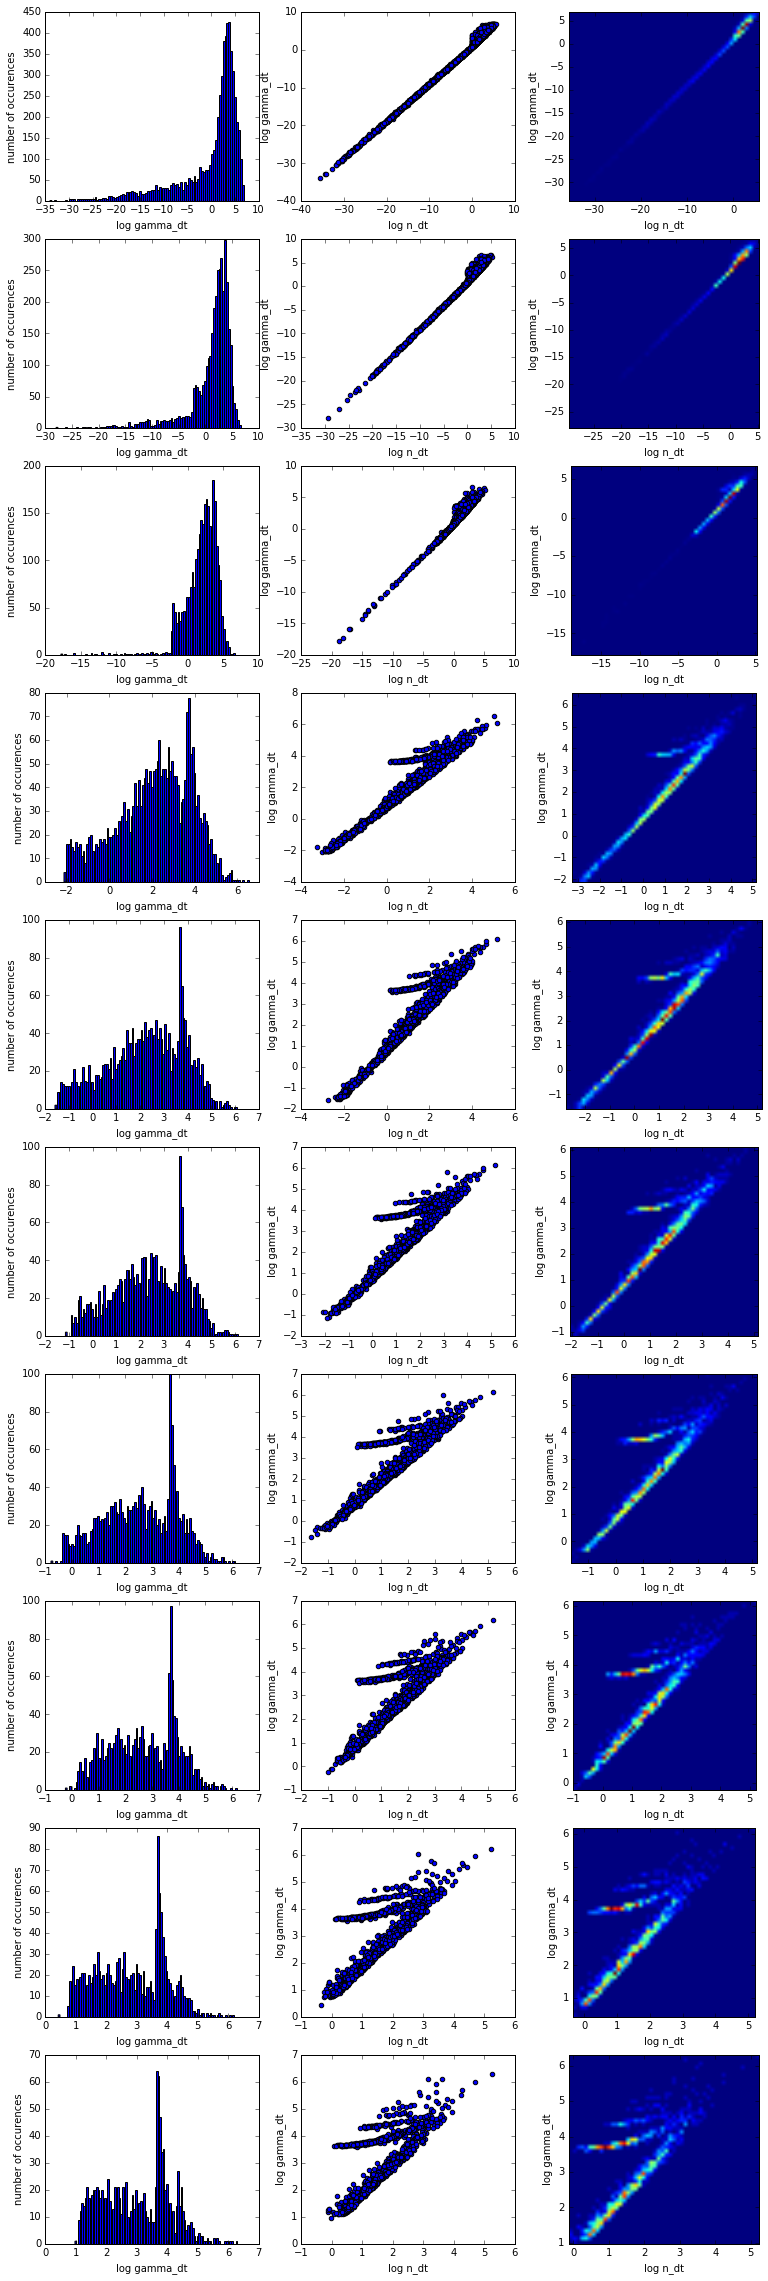

In [412]:
# design experiment

D, W = origin_freq_matrix.shape
T = 5

np.random.seed(42)

phi_matrix = np.random.uniform(size=(T, W)).astype(np.float64)
phi_matrix /= np.sum(phi_matrix, axis=1)[:, np.newaxis]

theta_matrix = np.random.uniform(size=(D, T)).astype(np.float64)
theta_matrix /= np.sum(theta_matrix, axis=1)[:, np.newaxis]

no_selection_params = {
    'method': perform_e_step_update,
    'block_size': 50,
    'p_dwt_processor': trivial_p_dwt_processor
}
obg_selection_params = {
    'method': perform_obg_e_step_update,
    'block_size': 50,
    'percentile': 97.5,
    'theta_percentile': 94,
    'theta_obg': True,
    'min_bound': -0.1,
    'return_gamma': True
}

regularizations_list = np.zeros(50, dtype=object)
params_list = np.zeros(50, dtype=object)

regularizations_list[:40] = trivial_regularization
regularizations_list[40:] = trivial_regularization
params_list[:40] = no_selection_params
params_list[40:] = obg_selection_params

logger = GammaDTLogger(10, 40)
phi, theta = launch_em(
    freq_matrix=origin_freq_matrix, 
    phi_matrix=phi_matrix,
    theta_matrix=theta_matrix,
    logger=logger,
    regularizations_list=regularizations_list,
    params_list=params_list,
    iters_count=50
)

In [413]:
evaluate(origin_freq_matrix, phi, theta, dataset)

L				-776647.0
Average topic correlation	0.2493
Phi nonzeros			5706 	frac	0.512438257746
Theta nonzeros			4202 	frac	0.47266591676
SVM score			0.7491


Правдобие немного ухудшилось, но благодаря этому матрицы ещё более разреженные получились. SVM качество осталось таким же. Зато на подбор параметров ушло много меньше времени.

In [414]:
obd_phi = phi
obd_theta = theta

0
L -775839.605592
1
L -775856.447806
2
L -775917.840571
3
L -776023.092276
4
L -776175.611239
5
L -776340.851203
6
L -776556.960324
7
L -776877.614777
8
L -777319.125398
9
L -778304.596909


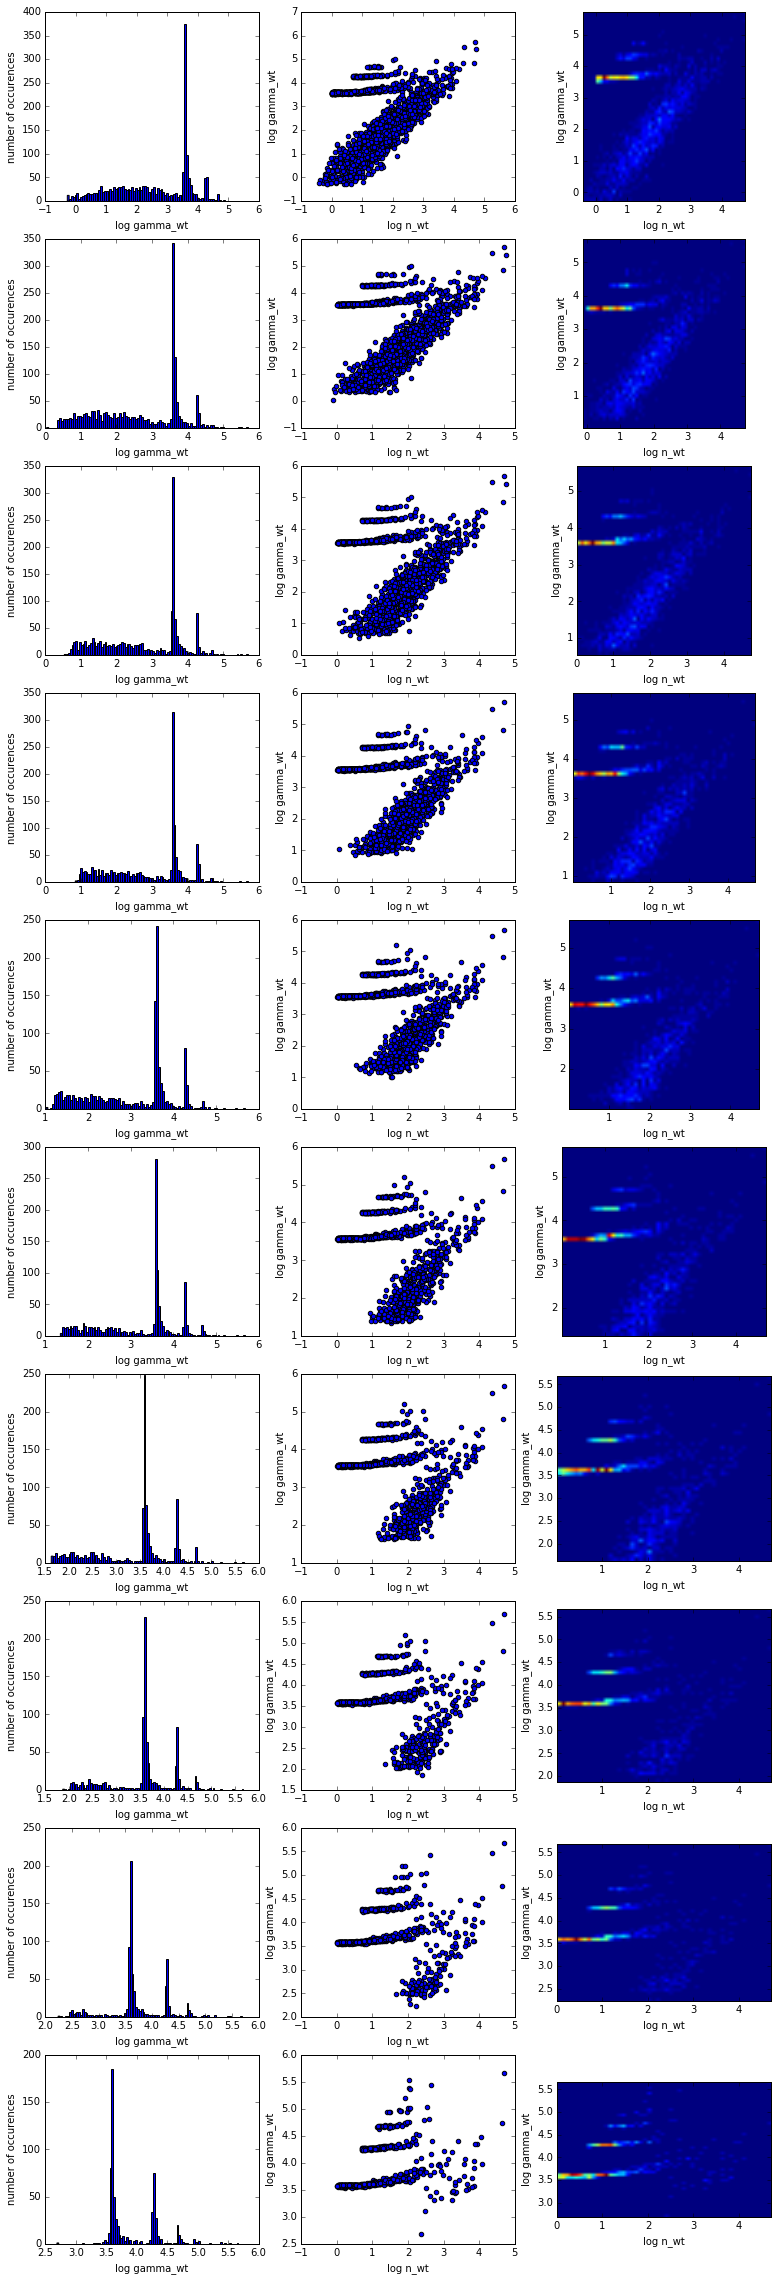

In [33]:
# design experiment

D, W = origin_freq_matrix.shape
T = 5

np.random.seed(42)

obg_selection_params = {
    'method': perform_obg_e_step_update,
    'block_size': 50,
    'percentile': 98.5,
    'theta_percentile': 97,
    'theta_obg': True,
    'min_bound': -0.1,
    'return_gamma': True
}

regularizations_list = np.zeros(10, dtype=object)
params_list = np.zeros(10, dtype=object)

regularizations_list[:] = trivial_regularization
params_list[:] = obg_selection_params

logger = GammaWTLogger(10, 0)
phi, theta = launch_em(
    freq_matrix=origin_freq_matrix, 
    phi_matrix=phi_sparse,
    theta_matrix=theta_sparse,
    logger=logger,
    regularizations_list=regularizations_list,
    params_list=params_list,
    iters_count=10
)

In [34]:
evaluate(origin_freq_matrix, phi, theta, dataset)

L				-778305.0
Average topic correlation	0.2493
Phi nonzeros			5431 	frac	0.487741356084
Theta nonzeros			3768 	frac	0.423847019123
SVM score			0.7553


## Ещё одно альтернативное решение: разреживать $p_{tdw}$ на Е шаге, чтобы каждое вхождение слова в документ описывалось небольшим числом тем.

In [36]:
# design experiment

D, W = origin_freq_matrix.shape
T = 5

np.random.seed(42)

phi_matrix = np.random.uniform(size=(T, W)).astype(np.float64)
phi_matrix /= np.sum(phi_matrix, axis=1)[:, np.newaxis]

theta_matrix = np.random.uniform(size=(D, T)).astype(np.float64)
theta_matrix /= np.sum(theta_matrix, axis=1)[:, np.newaxis]

big_selection_params = {
    'method': perform_e_step_update,
    'block_size': 50,
    'p_dwt_processor': create_frac_of_max_p_dwt_processor(0.5)
}
no_selection_params = {
    'method': perform_e_step_update,
    'block_size': 50,
    'p_dwt_processor': trivial_p_dwt_processor
}

regularizations_list = np.zeros(50, dtype=object)
params_list = np.zeros(50, dtype=object)

regularizations_list[:] = trivial_regularization
params_list[:40] = no_selection_params
params_list[40:47] = big_selection_params
params_list[47:50] = no_selection_params

phi, theta = launch_em(
    freq_matrix=origin_freq_matrix, 
    phi_matrix=phi_matrix,
    theta_matrix=theta_matrix,
    logger=DecorrLogger(0.),
    regularizations_list=regularizations_list,
    params_list=params_list,
    iters_count=50
)

0
L -820130.324989
decorr 4.99198902245
L + tau R -820130.324989
Phi non zeros elements 11135    fraction 1.0
Theta non zeros elements 8615    fraction 0.97
1
L -818134.945369
decorr 4.99199206386
L + tau R -818134.945369
Phi non zeros elements 11135    fraction 1.0
Theta non zeros elements 8615    fraction 0.97
2
L -816143.252192
decorr 4.99187356492
L + tau R -816143.252192
Phi non zeros elements 11135    fraction 1.0
Theta non zeros elements 8615    fraction 0.97
3
L -813868.70032
decorr 4.99164514986
L + tau R -813868.70032
Phi non zeros elements 11135    fraction 1.0
Theta non zeros elements 8615    fraction 0.97
4
L -811208.079829
decorr 4.99130649012
L + tau R -811208.079829
Phi non zeros elements 11135    fraction 1.0
Theta non zeros elements 8615    fraction 0.97
5
L -808210.26557
decorr 4.99086970024
L + tau R -808210.26557
Phi non zeros elements 11135    fraction 1.0
Theta non zeros elements 8615    fraction 0.97
6
L -805051.12136
decorr 4.99036885759
L + tau R -805051.12136

In [38]:
evaluate(origin_freq_matrix, phi, theta, dataset)

L				-776310.0
Average topic correlation	0.2493
Phi nonzeros			6641 	frac	0.596407723395
Theta nonzeros			3851 	frac	0.433183352081
SVM score			0.7272


Получается очень хорошее разреживание $\Theta$, неплохое разреживание $\Phi$. Однако SVM качество падает.

In [37]:
phi_sparse_ptdw, theta_sparse_ptdw = phi, theta

0
L -776245.705055
1
L -776269.710192
2
L -776339.660526
3
L -776478.173674
4
L -776713.632689
5
L -776991.828685
6
L -777624.893444
7
L -778555.412418
8
L -779500.169167
9
L -780336.479728


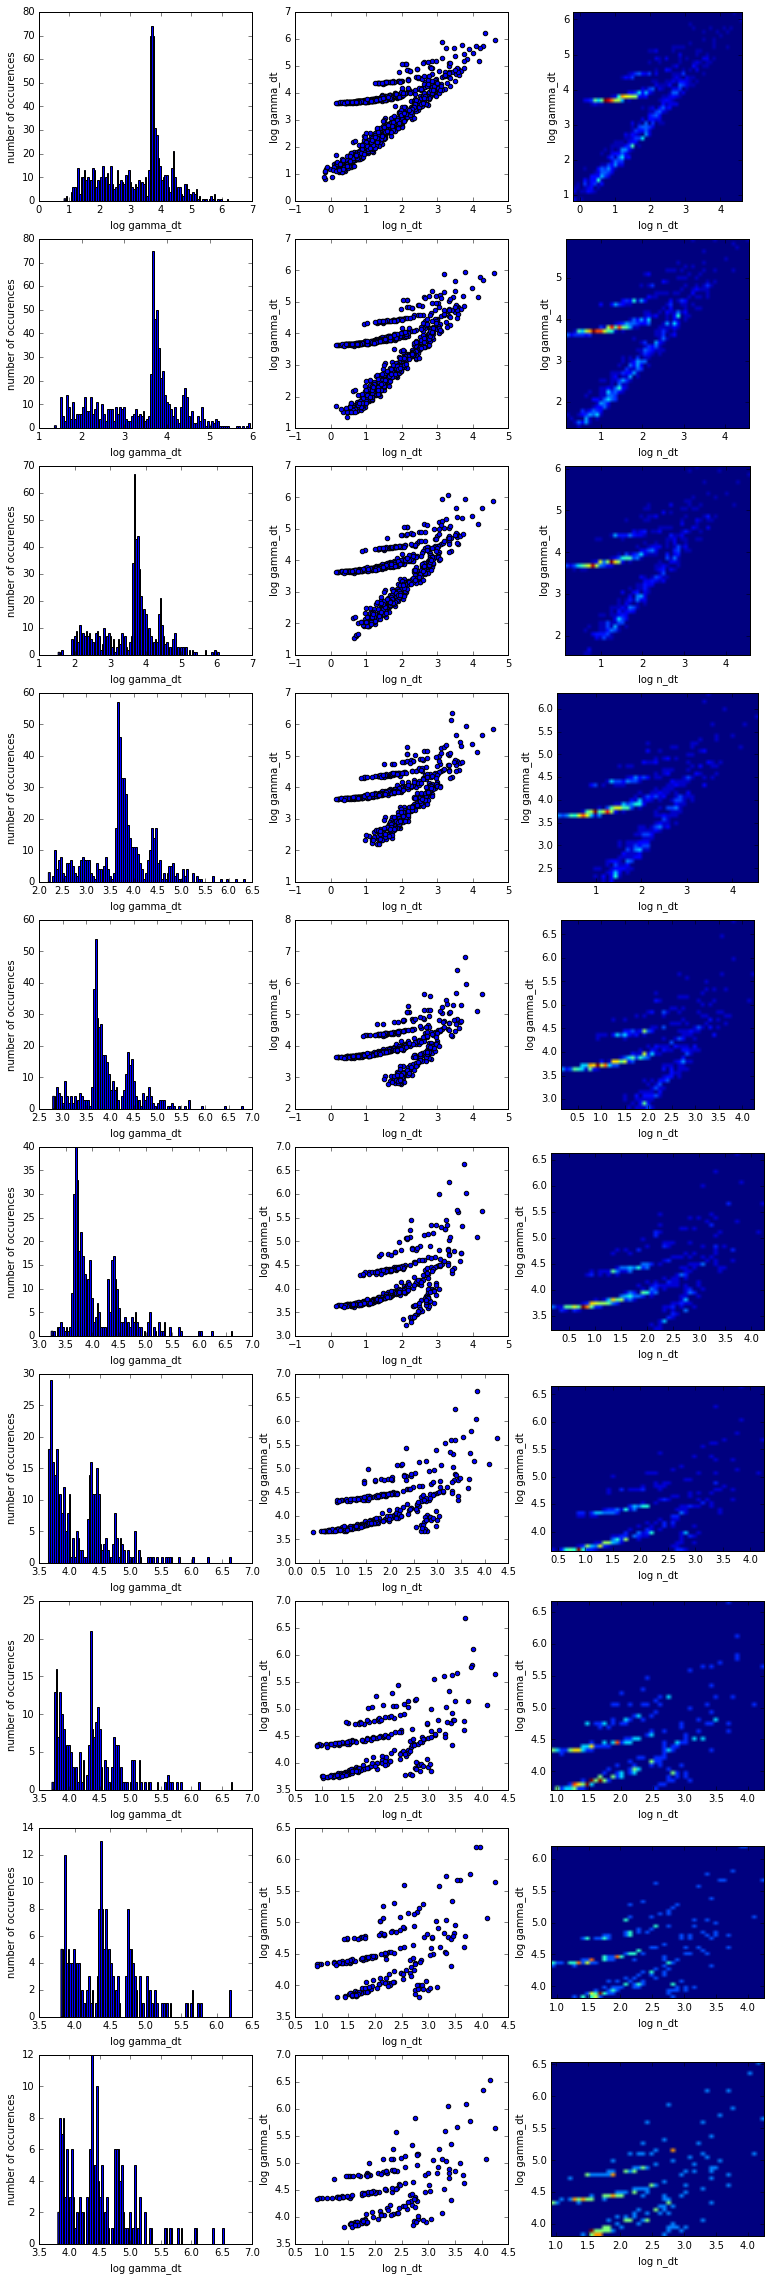

In [42]:
# design experiment

D, W = origin_freq_matrix.shape
T = 5

np.random.seed(42)

obg_selection_params = {
    'method': perform_obg_e_step_update,
    'block_size': 50,
    'percentile': 98.5,
    'theta_percentile': 97,
    'theta_obg': True,
    'min_bound': -0.1,
    'return_gamma': True
}

regularizations_list = np.zeros(10, dtype=object)
params_list = np.zeros(10, dtype=object)

regularizations_list[:] = trivial_regularization
params_list[:] = obg_selection_params

logger = GammaDTLogger(10, 0)
phi, theta = launch_em(
    freq_matrix=origin_freq_matrix, 
    phi_matrix=phi_sparse_ptdw,
    theta_matrix=theta_sparse_ptdw,
    logger=logger,
    regularizations_list=regularizations_list,
    params_list=params_list,
    iters_count=10
)

In [41]:
evaluate(origin_freq_matrix, phi, theta, dataset)

L				-780336.0
Average topic correlation	0.2493
Phi nonzeros			5729 	frac	0.514503816794
Theta nonzeros			3389 	frac	0.381214848144
SVM score			0.7339


In [171]:
# design experiment

D, W = origin_freq_matrix.shape
T = 5
theta[np.isnan(theta)] = 0.

for i in xrange(10 + 1):
    np.random.seed(i * 103 + 13)

    phi_matrix = np.random.uniform(size=(T, W)).astype(np.float64)
    phi_matrix[phi == 0] = 0
    phi_matrix[phi != 0] += 0.1
    phi_matrix /= np.sum(phi_matrix, axis=1)[:, np.newaxis]

    theta_matrix = np.random.uniform(size=(D, T)).astype(np.float64)
    theta_matrix[theta  == 0] = 0
    theta_matrix[theta != 0] += 0.1
    theta_matrix /= np.sum(theta_matrix, axis=1)[:, np.newaxis]

    no_selection_params = {
        'method': perform_e_step_update,
        'block_size': 50,
        'p_dwt_processor': trivial_p_dwt_processor
    }

    regularizations_list = np.zeros(50, dtype=object)
    params_list = np.zeros(50, dtype=object)

    regularizations_list[:] = trivial_regularization
    params_list[:] = no_selection_params

    phi_alt, theta_alt = launch_em(
        freq_matrix=origin_freq_matrix, 
        phi_matrix=phi_matrix,
        theta_matrix=theta_matrix,
        logger=empty_logger,
        regularizations_list=regularizations_list,
        params_list=params_list,
        iters_count=50
    )
    if i > 0:
        print 'Phi', np.nanmedian(np.abs(2 * (phi_alt - phi0) / (phi_alt + phi0)))
        print 'Theta', np.nanmedian(np.abs(2 * (theta_alt - theta0) / (theta_alt + theta0)))
        m1 = np.dot(theta0, phi0)
        m2 = np.dot(theta_alt, phi_alt)
        print 'Phi Theta', np.nanmedian(np.abs(2 * (m1 - m2) / (m1 + m2)))
        l = origin_freq_matrix.multiply(np.log(m2))
        print np.sum(l[l > -100])
        print '\n'
    else:
        phi0 = phi_alt
        theta0 = theta_alt

Phi 0.00199112615444
Theta 0.00192187693022
Phi Theta 0.00253205637882
-744326.723016


Phi 0.00438125968986
Theta 0.00459840166907
Phi Theta 0.0049770381062
-744323.46312


Phi 0.00785697868186
Theta 0.00639481033363
Phi Theta 0.00762013169815
-744415.746633


Phi 0.00214430331465
Theta 0.00220761884624
Phi Theta 0.00272358129625
-744328.72719


Phi 0.00792883634636
Theta 0.00608805424164
Phi Theta 0.00721070673232
-744514.536883


Phi 0.0037857706543
Theta 0.00385543932261
Phi Theta 0.00438019919414
-744322.923339




KeyboardInterrupt: 

In [159]:
x = np.abs(2 * (phi_alt - phi0) / (phi_alt + phi0))
y = sorted(x[~np.isnan(x)])
print y[100]
print y[int(len(y) * 0.95)]
print len(y)

5.7128958331e-05
0.0242017225928
6616


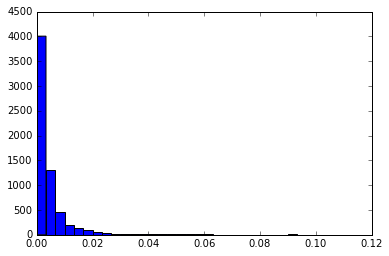

In [158]:
plt.hist(y, bins=30, range=(0, 0.1))
plt.show()

0
L -820130.324989
decorr 4.99198902245
L + tau R -820130.324989
Non zeros elements 11135    fraction 1.0
1
L -818134.945369
decorr 4.99199206386
L + tau R -818134.945369
Non zeros elements 11135    fraction 1.0
2
L -816143.252192
decorr 4.99187356492
L + tau R -816143.252192
Non zeros elements 11135    fraction 1.0
3
L -813868.70032
decorr 4.99164514986
L + tau R -813868.70032
Non zeros elements 11135    fraction 1.0
4
L -811208.079829
decorr 4.99130649012
L + tau R -811208.079829
Non zeros elements 11135    fraction 1.0
5
L -808210.26557
decorr 4.99086970024
L + tau R -808210.26557
Non zeros elements 11135    fraction 1.0
6
L -805051.12136
decorr 4.99036885759
L + tau R -805051.12136
Non zeros elements 11135    fraction 1.0
7
L -801923.213602
decorr 4.98984139522
L + tau R -801923.213602
Non zeros elements 11135    fraction 1.0
8
L -798961.070432
decorr 4.98930999273
L + tau R -798961.070432
Non zeros elements 11135    fraction 1.0
9
L -796239.748427
decorr 4.9887968683
L + tau R -79

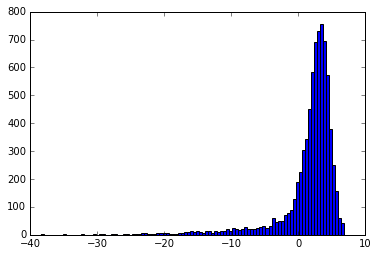

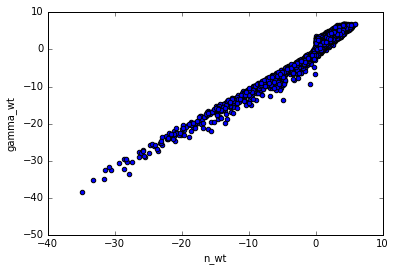

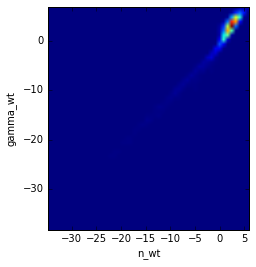

0.830713964975
False -0.1
40
L -776204.857865
decorr 4.98600311449
L + tau R -776204.857865
Non zeros elements 7118    fraction 0.64


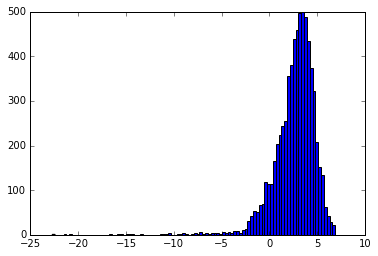

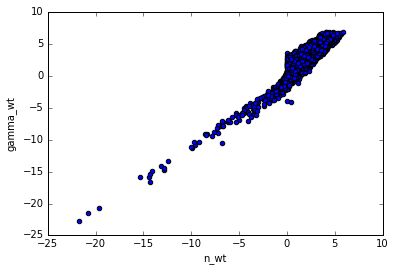

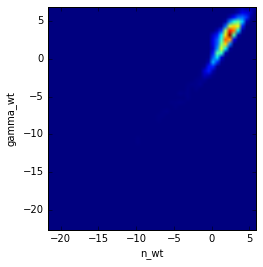

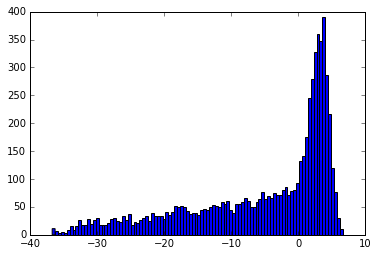

True -0.1
2451
41
L -776106.257463
decorr 4.98600406958
L + tau R -776106.257463
Non zeros elements 7118    fraction 0.64


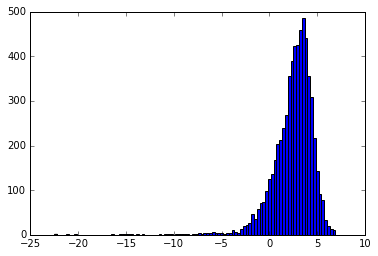

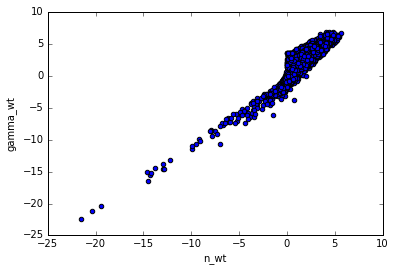

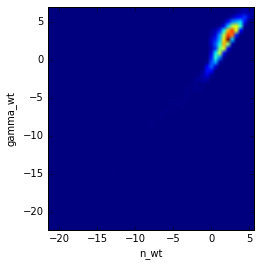

0.704535249214
False -0.150676336205
42
L -776010.395924
decorr 4.98598340535
L + tau R -776010.395924
Non zeros elements 6940    fraction 0.62


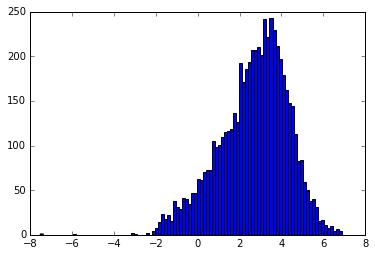

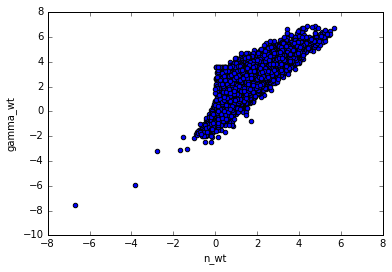

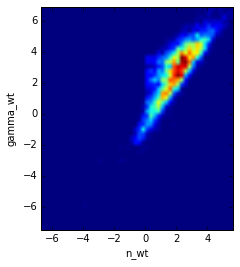

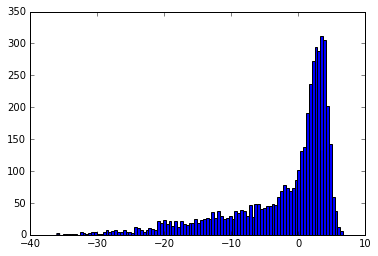

True -0.1
3499
43
L -775926.524694
decorr 4.98598317644
L + tau R -775926.524694
Non zeros elements 6940    fraction 0.62


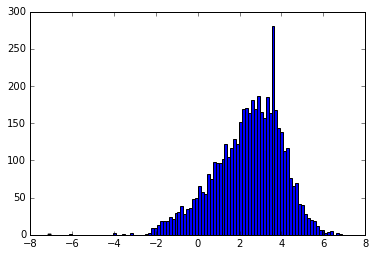

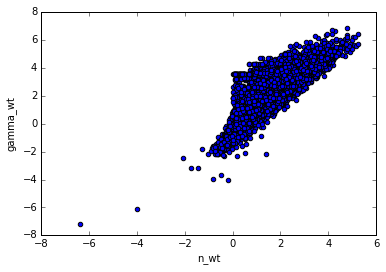

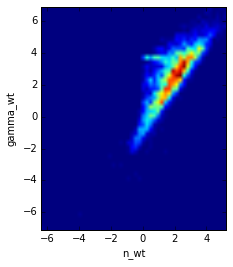

0.629546475079
False -0.38200702029
44
L -775854.784273
decorr 4.98593679909
L + tau R -775854.784273
Non zeros elements 6770    fraction 0.61


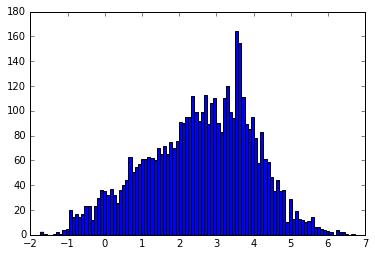

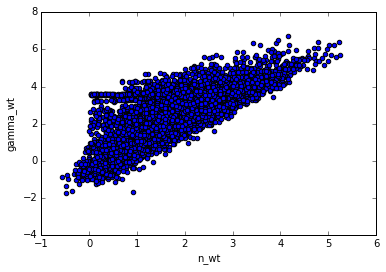

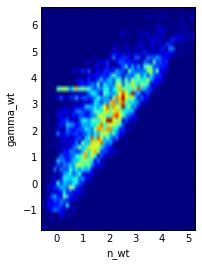

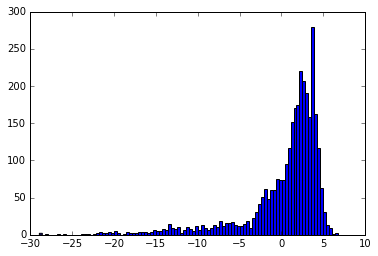

True -0.1
3961
45
L -775785.15645
decorr 4.9859526013
L + tau R -775785.15645
Non zeros elements 6770    fraction 0.61


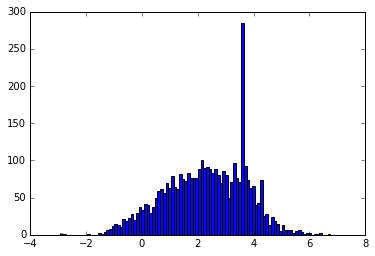

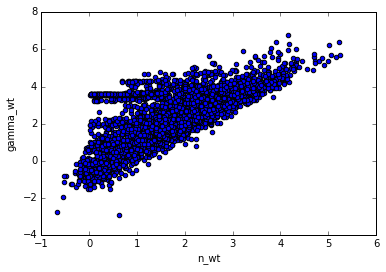

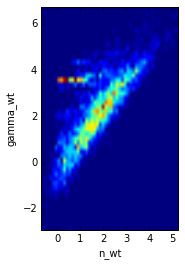

0.55276156264
False -0.746755753112
46
L -775754.596374
decorr 4.98588728667
L + tau R -775754.596374
Non zeros elements 6608    fraction 0.59


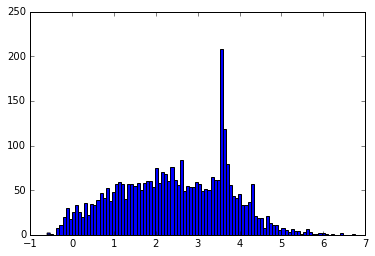

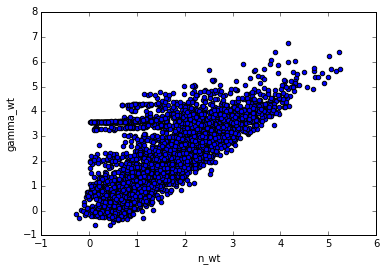

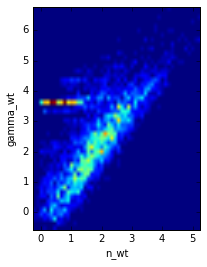

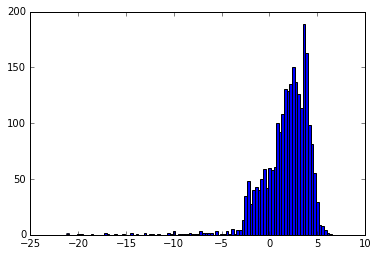

True -0.101919744049
4084
47
L -775690.118201
decorr 4.98591228361
L + tau R -775690.118201
Non zeros elements 6608    fraction 0.59


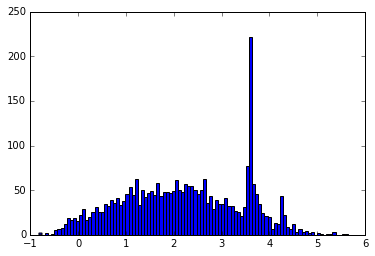

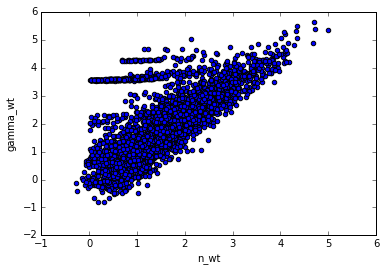

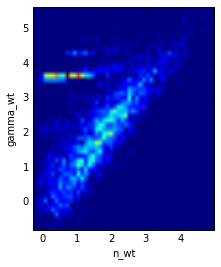

0.503816793893
False -1.20916683831
48
L -775716.46527
decorr 4.98581711263
L + tau R -775716.46527
Non zeros elements 6447    fraction 0.58


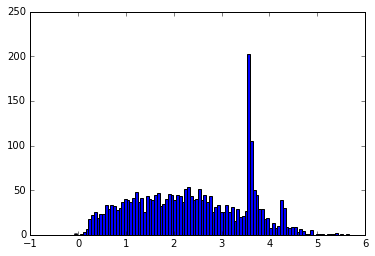

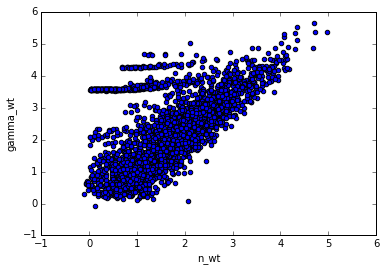

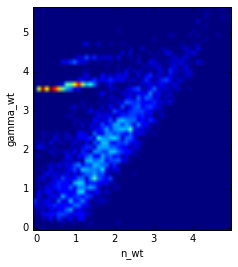

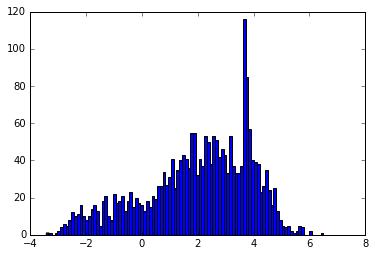

True -0.178072998144
4201
49
L -775647.913012
decorr 4.98585025352
L + tau R -775647.913012
Non zeros elements 6447    fraction 0.58


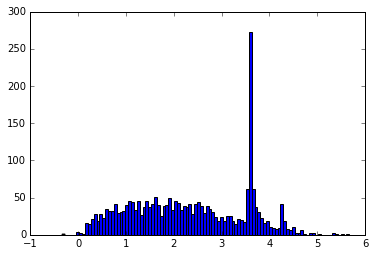

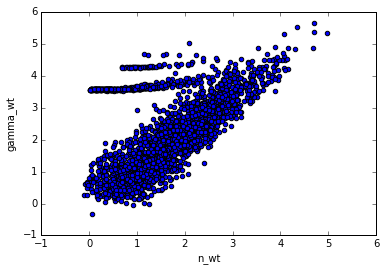

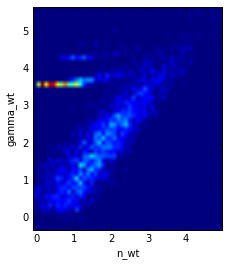

0.454872025146
False -1.7705673174
50
L -775737.793039
decorr 4.9857300975
L + tau R -775737.793039
Non zeros elements 6290    fraction 0.56


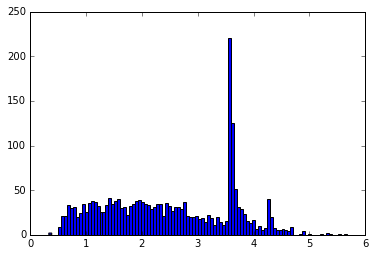

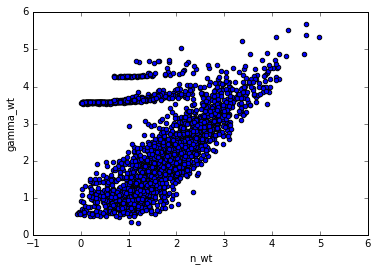

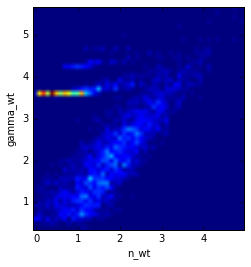

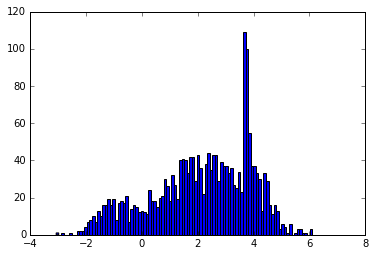

True -0.309508573442
4316
51
L -775655.306774
decorr 4.985761272
L + tau R -775655.306774
Non zeros elements 6290    fraction 0.56


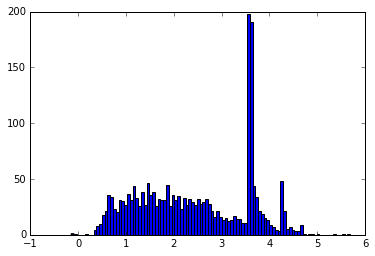

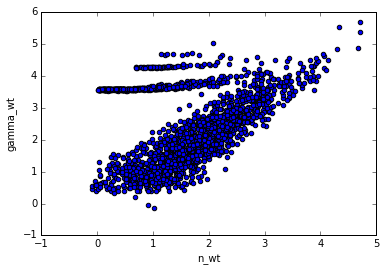

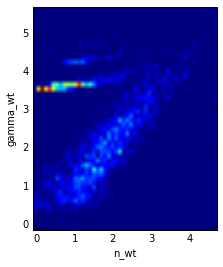

0.400987876066
False -2.2106028433
52
L -775781.746766
decorr 4.98562405455
L + tau R -775781.746766
Non zeros elements 6138    fraction 0.55


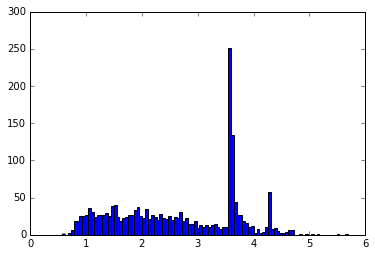

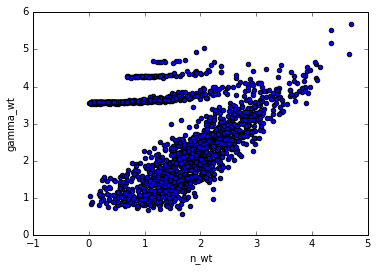

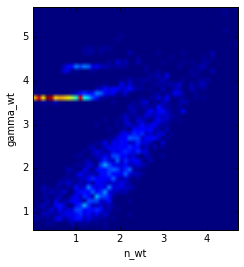

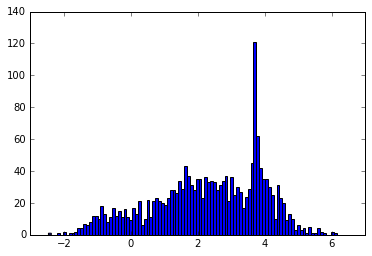

True -0.538796846711
4430
53
L -775683.441794
decorr 4.98566663098
L + tau R -775683.441794
Non zeros elements 6138    fraction 0.55


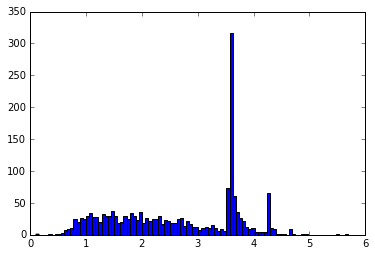

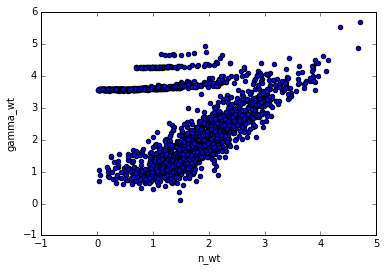

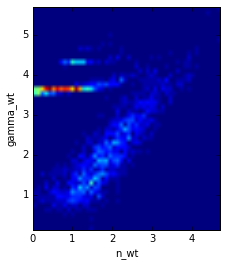

0.352492141895
False -2.84101644089
54
L -775867.135904
decorr 4.98551265912
L + tau R -775867.135904
Non zeros elements 5988    fraction 0.54


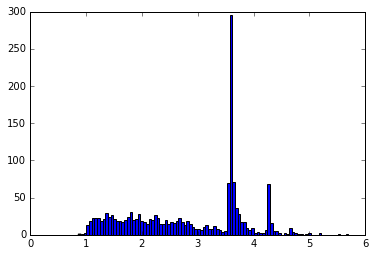

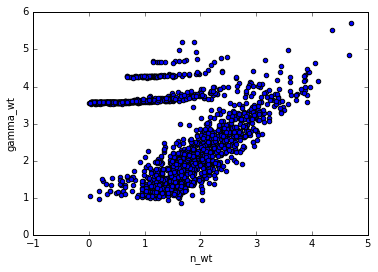

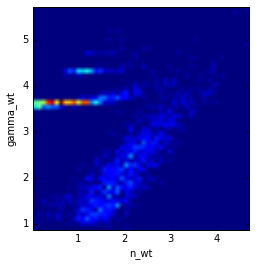

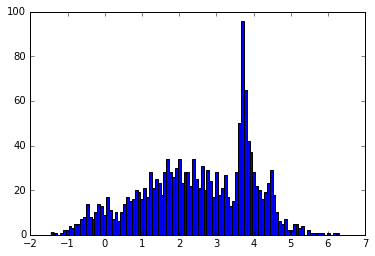

True -1.01972153508
4537
55
L -775754.349913
decorr 4.98557086606
L + tau R -775754.349913
Non zeros elements 5988    fraction 0.54


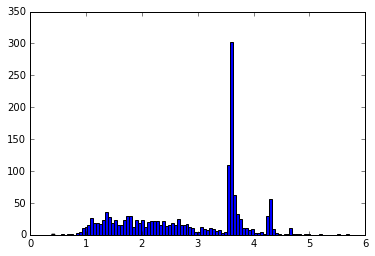

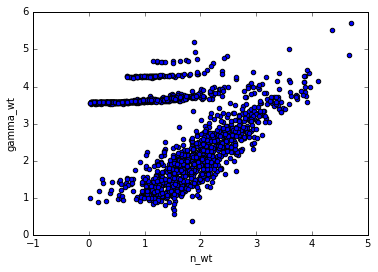

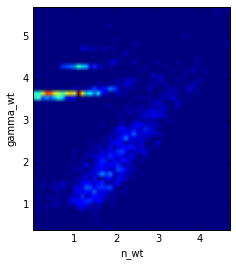

0.312977099237
False -3.79584719828
56
L -776002.040904
decorr 4.98540123367
L + tau R -776002.040904
Non zeros elements 5843    fraction 0.52


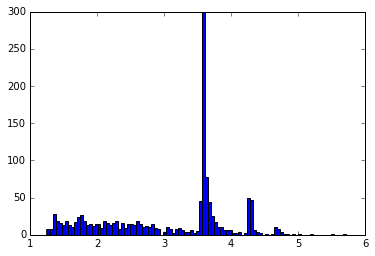

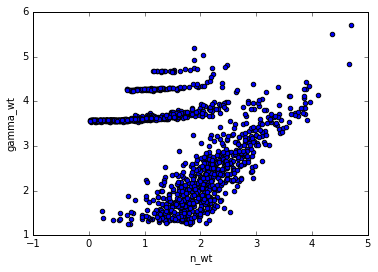

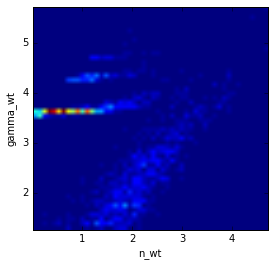

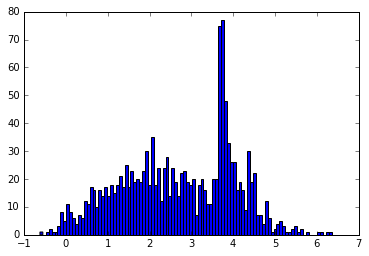

True -1.92515454062
4644
57
L -775873.640883
decorr 4.98548383164
L + tau R -775873.640883
Non zeros elements 5843    fraction 0.52


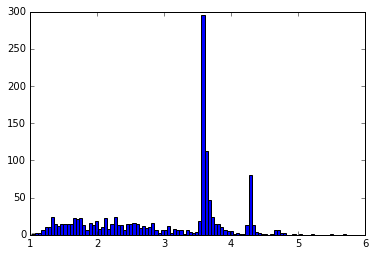

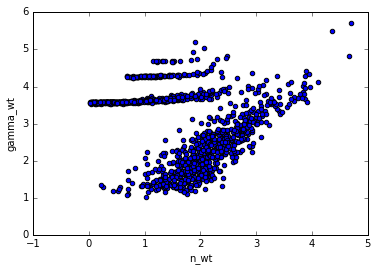

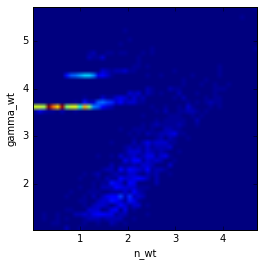

0.284238886394
False -5.25144410778
58
L -776213.925971
decorr 4.98528376809
L + tau R -776213.925971
Non zeros elements 5702    fraction 0.51


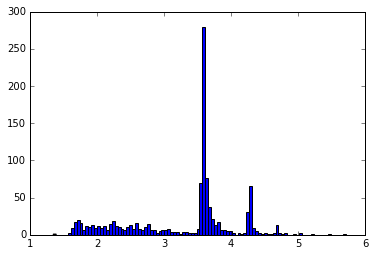

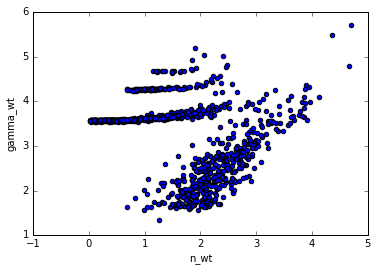

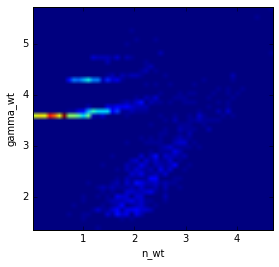

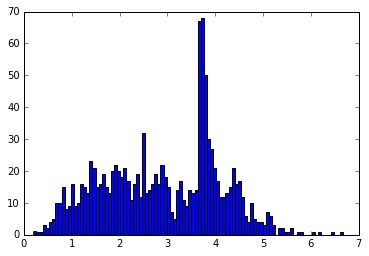

True -3.25309846941
4749
59
L -776062.88169
decorr 4.98539294868
L + tau R -776062.88169
Non zeros elements 5702    fraction 0.51


In [458]:
# design experiment

D, W = origin_freq_matrix.shape
T = 5

np.random.seed(42)

phi_matrix = np.random.uniform(size=(T, W)).astype(np.float64)
phi_matrix /= np.sum(phi_matrix, axis=1)[:, np.newaxis]

theta_matrix = np.random.uniform(size=(D, T)).astype(np.float64)
theta_matrix /= np.sum(theta_matrix, axis=1)[:, np.newaxis]

no_selection_params = {
    'method': perform_e_step_update,
    'block_size': 50,
    'p_dwt_processor': trivial_p_dwt_processor
}
obg_selection_params1 = {
    'method': perform_obg_e_step_update,
    'block_size': 50,
    'percentile': 97.5,
    'theta_percentile': 97.5,
    'theta_obg': True,
    'min_bound': -0.1
}
obg_selection_params2 = {
    'method': perform_obg_e_step_update,
    'block_size': 50,
    'percentile': 97.5,
    'theta_percentile': 97.5,
    'theta_obg': False,
    'min_bound': -0.1
}

regularizations_list = np.zeros(60, dtype=object)
params_list = np.zeros(60, dtype=object)

regularizations_list[:40] = trivial_regularization
regularizations_list[40:50] = create_reg_lda(-0.5, -0.1)
regularizations_list[40:] = trivial_regularization
params_list[:50] = no_selection_params
params_list[40::2] = obg_selection_params2
params_list[41::2] = obg_selection_params1

phi, theta = launch_em(
    freq_matrix=origin_freq_matrix, 
    phi_matrix=phi_matrix,
    theta_matrix=theta_matrix,
    logger=create_decorr_logger(0.),
    regularizations_list=regularizations_list,
    params_list=params_list,
    iters_count=60
)

In [459]:
evaluate(origin_freq_matrix, phi, theta, dataset)

L				-776063.0
Average topic correlation	0.2493
Phi nonzeros			5702 	frac	0.512079030085
Theta nonzeros			4141 	frac	0.465804274466
SVM score			0.7615


In [441]:
# design experiment

D, W = origin_freq_matrix.shape
T = 5

np.random.seed(42)

phi_matrix = np.random.uniform(size=(T, W)).astype(np.float64)
phi_matrix /= np.sum(phi_matrix, axis=1)[:, np.newaxis]

theta_matrix = np.random.uniform(size=(D, T)).astype(np.float64)
theta_matrix /= np.sum(theta_matrix, axis=1)[:, np.newaxis]

no_selection_params = {
    'method': perform_e_step_update,
    'block_size': 50,
    'p_dwt_processor': trivial_p_dwt_processor
}
regularizations_list = np.zeros(60, dtype=object)
params_list = np.zeros(60, dtype=object)

regularizations_list[:40] = trivial_regularization
regularizations_list[40:] = create_reg_lda(-0.5, -0.1)
params_list[:60] = no_selection_params

phi, theta = launch_em(
    freq_matrix=origin_freq_matrix, 
    phi_matrix=phi_matrix,
    theta_matrix=theta_matrix,
    logger=create_decorr_logger(0.),
    regularizations_list=regularizations_list,
    params_list=params_list,
    iters_count=60
)

0
L -820130.324989
decorr 4.99198902245
L + tau R -820130.324989
Non zeros elements 11135    fraction 1.0
1
L -818134.945369
decorr 4.99199206386
L + tau R -818134.945369
Non zeros elements 11135    fraction 1.0
2
L -816143.252192
decorr 4.99187356492
L + tau R -816143.252192
Non zeros elements 11135    fraction 1.0
3
L -813868.70032
decorr 4.99164514986
L + tau R -813868.70032
Non zeros elements 11135    fraction 1.0
4
L -811208.079829
decorr 4.99130649012
L + tau R -811208.079829
Non zeros elements 11135    fraction 1.0
5
L -808210.26557
decorr 4.99086970024
L + tau R -808210.26557
Non zeros elements 11135    fraction 1.0
6
L -805051.12136
decorr 4.99036885759
L + tau R -805051.12136
Non zeros elements 11135    fraction 1.0
7
L -801923.213602
decorr 4.98984139522
L + tau R -801923.213602
Non zeros elements 11135    fraction 1.0
8
L -798961.070432
decorr 4.98930999273
L + tau R -798961.070432
Non zeros elements 11135    fraction 1.0
9
L -796239.748427
decorr 4.9887968683
L + tau R -79

In [327]:
evaluate(origin_freq_matrix, phi, theta, dataset)

L				-775867.0
Average topic correlation	0.2492
Phi nonzeros			6095 	frac	0.547373147732
Theta nonzeros			4233 	frac	0.476152980877
SVM score			0.7559


In [393]:
a = np.array([
        [1, 4, 5, 5],
        [2, 1, 3, 4],
        [6, 4, 7, 4]
    ])
k = 3
bound = 1
b = np.argpartition(a, k - 1, axis=1)[:, :k]
positions = np.zeros((3, 4), dtype=bool)
positions[np.arange(3)[:, np.newaxis], b] |= True
positions[a > bound] = False
a[positions] = 0
a

array([[0, 4, 5, 5],
       [2, 0, 3, 4],
       [6, 4, 7, 4]])

In [379]:
a[][submatrix <= 3] = 0

In [389]:
positions

array([[ True, False, False, False],
       [ True,  True, False, False],
       [False, False, False, False]], dtype=bool)

In [73]:
T, W = plsa_phi.shape
D, T = plsa_theta.shape

(2227, 2227)

In [85]:
pmi_matrix = np.zeros((W, W), dtype=float)
for pair, value in cooccurences.iteritems():
    if pair[0] != pair[1] and value > 2:
        pmi_matrix[pair[0], pair[1]] = np.log(1. * D * value / cooccurences[(pair[0], pair[0])] / cooccurences[(pair[1], pair[1])])

In [86]:
np.sum(pmi_matrix > 0)

63012

In [87]:
np.sum(pmi_matrix < 0)

48492

In [293]:
matrix = pmi_matrix * (plsa_phi[4, :, np.newaxis] * plsa_phi[4, np.newaxis, :])

In [294]:
MAX_NUM = W

In [295]:
def target_function(elems_set):
    pos = list(elems_set)
    return np.sum(matrix[np.ix_(pos, pos)])

In [296]:
def crossover(fst_set, snd_set):
    positions = fst_set | snd_set
    elem_2_num = dict(zip(positions, range(len(positions))))
    num_2_elem = dict(zip(range(len(positions)), positions))
    probs = np.zeros(len(positions))
    for e in fst_set:
        probs[elem_2_num[e]] += 1.
    for e in snd_set:
        probs[elem_2_num[e]] += 1.
    probs /= np.sum(probs)
    positions = np.array(list(positions))

    for i in xrange(10):
        yield set(np.random.choice(positions, len(fst_set), replace=False, p=probs))

In [297]:
def mutate(elem_set):
    size = len(elem_set)
    elem_set = elem_set | set(np.random.choice(MAX_NUM, 5, replace=False))
    elem_set = list(elem_set)
    for _ in xrange(5):
        yield set(np.random.choice(elem_set, size, replace=False))

In [298]:
def get_initial_state(k=20, size=100):
    result = []
    for i in xrange(size):
        result.append(set(np.random.choice(MAX_NUM, k, replace=False)))
    return result

In [299]:
#%%time
state = get_initial_state(k=10)
scores = [target_function(r) for r in state]

for i in xrange(100):
    print state[0], scores[0]
    print ''
    
    probs = np.array(scores)
    probs -= np.max(probs)
    probs = np.exp(probs / 3.)
    probs /= np.sum(probs)
    
    new_generation = list(state)
    #crossover candidates
    for i in xrange(30):
        fst, snd = np.random.choice(state, 2, replace=False, p=probs)
        for r in crossover(fst, snd):
            new_generation.append(r)
            
    #mutation_candidates
    mutations = []
    for rec in new_generation:
        for r in mutate(rec):
            mutations.append(r)
            
    # selection
    scored = [(x, target_function(x)) for x in new_generation + mutations]
    scored = heapq.nlargest(100, scored, key=lambda x: x[1])
    state, scores = zip(*scored)

set([2112, 1571, 359, 2089, 631, 14, 2133, 1577, 1246, 383]) 5.83015220958e-05

set([1412, 1765, 935, 1289, 839, 1008, 1233, 500, 1079, 1596]) 7.41657028736e-05

set([352, 1601, 450, 1475, 390, 1064, 1867, 2221, 1270, 383]) 0.000318036105094

set([352, 321, 834, 390, 1607, 1867, 1742, 1049, 1787, 383]) 0.000819707302367

set([321, 1891, 1412, 390, 1286, 808, 1008, 213, 2008, 383]) 0.00151386438479

set([352, 321, 1571, 390, 1739, 1008, 849, 373, 383, 1311]) 0.00241952817625

set([321, 1412, 390, 808, 809, 1008, 849, 500, 1732, 383]) 0.00306548392934

set([352, 321, 388, 390, 2089, 1069, 334, 1008, 849, 383]) 0.00320486458004

set([352, 321, 390, 808, 875, 1708, 1008, 849, 1948, 383]) 0.00350178758521

set([321, 390, 1233, 808, 2089, 875, 1008, 849, 1822, 383]) 0.00361412947224

set([321, 322, 1571, 390, 808, 2089, 875, 1008, 849, 383]) 0.00387882674407

set([321, 390, 358, 809, 875, 1008, 849, 819, 1114, 383]) 0.00424152210589

set([321, 390, 358, 808, 809, 875, 1008, 849, 1948, 383]) 

In [221]:
for x, y in zip(state[0], heapq.nlargest(20, range(W), key=lambda w: phi_matrix[4, w])):
    print '{}\t{}'.format(num_2_token[x], num_2_token[y])

launch/NN	hundred/NN
space/NN	joint/JJ
orbit/NN	notion/NN
rocket/NN	mind/NN
shuttle/NN	interested/JJ
mar/VB	fee/NN
flight/NN	experiment/NN
launch/VB	differential/JJ
lunar/JJ	pressure/NN
spacecraft/NN	establish/VB
mission/NN	rare/JJ
satellite/NN	hand/NN
earth/NN	invest/VB
service/NN	satellite/NN
orbital/JJ	ac/JJ
ohm/JJ	war/NN
ground/NN	definition/NN
vehicle/NN	couple/NN
system/NN	gps/NN
surface/NN	richard/NN


In [212]:
for x, y in zip(state[0], heapq.nlargest(20, range(W), key=lambda w: phi_matrix[3, w])):
    print '{}\t{}'.format(num_2_token[x], num_2_token[y])

allergic/JJ	mike/NN
therapy/NN	finally/RB
cause/VB	loss/NN
problem/NN	joint/JJ
study/NN	anymore/RB
infection/NN	junk/NN
yeast/NN	watch/NN
say/VB	short/JJ
food/NN	offer/VB
symptom/NN	experience/VB
treatment/NN	edge/NN
medication/NN	public/NN
patient/NN	congress/NN
msg/NN	complain/VB
person/NN	second/NN
diet/NN	lower/RB
drug/NN	orbital/JJ
doctor/NN	steve/VB
pain/NN	rational/JJ
evidence/NN	transmission/NN


In [204]:
for x, y in zip(state[0], heapq.nlargest(20, range(W), key=lambda w: phi_matrix[2, w])):
    print '{}\t{}'.format(num_2_token[x], num_2_token[y])

pin/NN	pioneer/NN
connect/VB	thanx/NN
circuit/NN	establish/VB
resistor/NN	ram/VB
output/NN	update/NN
amp/NN	call/VB
current/JJ	edward/NN
voltage/NN	science/NN
supply/NN	error/NN
signal/NN	department/NN
device/NN	summarize/VB
input/NN	load/NN
chip/NN	please/VB
resistance/NN	clear/JJ
line/NN	oscillator/NN
volt/NN	see/VB
run/VB	push/VB
electronic/NN	figure/NN
switch/VB	present/JJ
wire/NN	island/NN


In [196]:
for x, y in zip(state[0], heapq.nlargest(20, range(W), key=lambda w: phi_matrix[1, w])):
    print '{}\t{}'.format(num_2_token[x], num_2_token[y])

care/NN	throw/VB
center/NN	light/NN
national/JJ	file/NN
page/NN	reply/VB
child/NN	relatively/RB
medical/JJ	alleviate/VB
aids/NN	resolution/NN
disease/NN	display/NN
volume/NN	letter/NN
report/NN	peter/VB
patient/NN	signal/NN
health/NN	element/NN
clinical/JJ	dsl/NN
medicine/NN	difficulty/NN
service/NN	neutral/JJ
research/NN	start/NN
newsletter/NN	parallel/NN
report/VB	run/NN
cancer/NN	discussion/NN
april/NN	hospital/NN


In [188]:
for x, y in zip(state[0], heapq.nlargest(20, range(W), key=lambda w: phi_matrix[0, w])):
    print '{}\t{}'.format(num_2_token[x], num_2_token[y])

space/NN	med/VB
gov/NN	crew/NN
telescope/NN	divide/VB
center/NN	division/NN
national/JJ	care/NN
shuttle/NN	user/NN
list/NN	policy/NN
astronaut/NN	comment/NN
nasa/JJ	plastic/NN
archive/NN	description/NN
planetary/JJ	track/VB
anonymous/JJ	need/RB
nasa/RB	york/NN
available/JJ	point/VB
pub/NN	index/NN
astronomy/NN	introduce/VB
keyboard/NN	equivalent/JJ
nasa/NN	end/VB
include/VB	energy/NN
program/NN	orbit/NN


In [222]:
import pickle

In [223]:
with open('plsa_phi.pkl', 'w') as f:
    pickle.dump(plsa_phi, f)
with open('plsa_theta.pkl', 'w') as f:
    pickle.dump(plsa_phi, f)
with open('num_2_token.pkl', 'w') as f:
    pickle.dump(num_2_token, f)
with open('cooccurences.pkl', 'w') as f:
    pickle.dump(cooccurences, f)

In [403]:
for x in heapq.nlargest(10, range(W), key=lambda w: phi_sparse[0, w]):
    print '{}'.format(num_2_token[x][:-3])

space
edu
com
nasa
program
information
available
system
include
keyboard


In [404]:
for x in heapq.nlargest(10, range(W), key=lambda w: phi_sparse[1, w]):
    print '{}'.format(num_2_token[x][:-3])

health
disease
medical
center
cancer
use
number
patient
year
research


In [405]:
for x in heapq.nlargest(10, range(W), key=lambda w: phi_sparse[2, w]):
    print '{}'.format(num_2_token[x][:-3])

get
used
know
use
circuit
anyone
power
look
work
good


In [406]:
for x in heapq.nlargest(10, range(W), key=lambda w: phi_sparse[3, w]):
    print '{}'.format(num_2_token[x][:-3])

get
person
know
say
think
see
make
time
take
go


In [407]:
for x in heapq.nlargest(10, range(W), key=lambda w: phi_sparse[4, w]):
    print '{}'.format(num_2_token[x][:-3])

space
satellite
orbit
launch
earth
system
ground
used
year
mission


In [313]:
from termcolor import colored
print colored('hello', 'red'), colored('world', 'green')
print colored("hello red world", 'red')

hello world
hello red world


In [350]:
colors = [
    'red',
    'green',
    'blue',
    'magenta',
    'cyan'
]

In [408]:
def create_colored_text(text_tokens, token_2_num_fun, phi_matrix):
    res = [] 
    for raw_token in text_tokens:
        w_num = token_2_num_fun(raw_token)
        if w_num is not None:
            topic_num = np.argmax(phi_matrix[:, w_num])
            res.append(colored(raw_token, colors[topic_num]))
        else:
            res.append(raw_token)
    return ' '.join(res)

In [668]:
def create_viterbi_colored_text(text_tokens, token_2_num_fun, phi_matrix, topic_change_prob=0.1):
    res = []
    T = phi_matrix.shape[0]
    scores = np.zeros(T)
    topics_scores = [np.array(scores)]
    topics_from = []
    
    for raw_token in text_tokens:
        w_num = token_2_num_fun(raw_token)
        if w_num is not None:
            log_emission_score = np.log(phi_matrix[:, w_num])
        else:
            log_emission_score = np.zeros(T) - np.log(T)
            
        new_scores = scores + log_emission_score + np.log(1 - topic_change_prob) 
        new_from = np.arange(T)
        
        best_previous_topic = np.argmax(scores)
        best_previous_score = scores[best_previous_topic]
        new_scores_with_change = best_previous_score + log_emission_score + np.log(topic_change_prob / (T - 1))
        
        improvement_indices = (new_scores_with_change > new_scores)
        new_scores[improvement_indices] = new_scores_with_change[improvement_indices]
        new_from[improvement_indices] = best_previous_topic
        
        
        topics_scores.append(np.array(new_scores))
        topics_from.append(np.array(new_from))
        scores = new_scores
        
    res_topics = []
    curr_topic = np.argmax(scores)
    for curr_from in topics_from[::-1]:
        res_topics.append(curr_topic)
        curr_topic = curr_from[curr_topic]
    res_topics = res_topics[::-1]
        
        
    res = [] 
    for i, raw_token in enumerate(text_tokens):
        res.append(colored(raw_token, colors[res_topics[i]]))
            
    return ' '.join(res)

In [670]:
def token_2_num_fun(token):
    res = gensim.utils.lemmatize(token)
    if len(res) > 0:
        return token_2_num.get(res[0]) 
    else:
        return None

for i, doc in enumerate(dataset.data):
    print 'Topic is ', dataset.target_names[dataset.target[i]]
    print '\n'
    print create_viterbi_colored_text(doc.split(), token_2_num_fun, phi_sparse, topic_change_prob=0.01)
    print '\n\n'
    print create_colored_text(doc.split(), token_2_num_fun, plsa_phi)
    print '\n=================================================================\n'
    
    if i == 10:
        break

Topic is  sci.space


Another fish to check out is Richard Rast -- he works for Lockheed Missiles, but is on-site at NASA Johnson. Nick Johnson at Kaman Sciences in Colo. Spgs and his friend, Darren McKnight at Kaman in Alexandria, VA. Good luck. R. Landis



Another fish to check out is Richard Rast -- he works for Lockheed Missiles, but is on-site at NASA Johnson. Nick Johnson at Kaman Sciences in Colo. Spgs and his friend, Darren McKnight at Kaman in Alexandria, VA. Good luck. R. Landis


Topic is  sci.electronics


: As the subject says - Can I use a 4052 for digital signals? I don't see : why it couldn't handle digital signals, but I could be wrong. Anyone have : any advice? Thanks. The switches have a non-negligable on resistance (up to 1k ohm when powered by 5 volts) and a maximum current and a Maximum Static Voltage Across Switch. Not a good bet for TTL. Should work for CMOS, but slow things down a bit. There are 74HC versions that have better specs. but lower max voltage.



:

In [641]:
# design experiment

D, W = origin_freq_matrix.shape
T = 5

np.random.seed(777)

phi_matrix = np.random.uniform(size=(T, W)).astype(np.float64)
#phi_matrix[phi_old == 0.] = 0.
phi_matrix /= np.sum(phi_matrix, axis=1)[:, np.newaxis]

theta_matrix = np.random.uniform(size=(D, T)).astype(np.float64)
#theta_matrix[theta_old == 0.] = 0
theta_matrix /= np.sum(theta_matrix, axis=1)[:, np.newaxis]

no_selection_params = {
    'method': perform_e_step_update,
    'block_size': 50,
    'p_dwt_processor': trivial_p_dwt_processor
}

regularizations_list = np.zeros(50, dtype=object)
params_list = np.zeros(50, dtype=object)

regularizations_list[:40] = trivial_regularization
regularizations_list[40:] = create_reg_lda(-0.05, -0.01)
params_list[:] = no_selection_params

phi, theta = launch_em(
    freq_matrix=new_freq_matrix, 
    phi_matrix=phi_matrix,
    theta_matrix=theta_matrix,
    logger=EmptyLogger(),
    regularizations_list=regularizations_list,
    params_list=params_list,
    iters_count=40
)

In [642]:
phi2 = phi

In [650]:
diff = 2 * np.abs(phi - phi_old) / (phi + phi_old)
np.mean(diff[phi_old > 0]) * 100

130.11689136477972

In [659]:
for t in xrange(T):
    min_val = 1e9
    min_t = -1
    for ot in xrange(T):
        diff = 2 * np.abs(phi[t, :] - phi_old[ot, :]) / (phi[t, :] + phi_old[ot, :])
        scipy.stats.entropy(phi[t, :], phi_old[ot, :])
        diff = np.mean(diff[phi_old[ot, :] > 0])
        #print t, ot, diff
        if min_val > diff:
            min_val = diff
            min_t = ot
    print t, min_t, min_val

0 2 0.0343309954805
1 3 0.0444712294146
2 4 0.200265269536
3 1 0.142519793717
4 0 0.243037911368


In [628]:
unitopic = np.sum(theta_old == 0, axis=1) == 4
print theta_old[unitopic, :]
print np.sum(theta_old[unitopic, :], axis=0)

[[ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 ..., 
 [ 1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]]
[  12.    9.  113.   55.   13.]


In [577]:
#m = np.dot(theta, phi)
#print np.sum(np.isnan(m))
#m[np.isnan(m)] = 0.
#new_freq_matrix = sparse.csr_matrix(m)

#new_freq_matrix

In [578]:
#phi_old = np.array(phi)
#theta_old = np.array(theta)

In [601]:
phi

array([[  8.76494744e-05,   1.40022288e-03,   3.83352730e-04, ...,
          4.28569309e-09,   1.00823397e-04,   3.85734472e-04],
       [  1.41299445e-04,   3.78356965e-07,   3.26239006e-04, ...,
          1.06380513e-04,   3.43894241e-06,   1.13021423e-10],
       [  1.70321192e-03,   2.47427681e-14,   6.61284162e-03, ...,
          7.23409283e-04,   5.42175563e-05,   3.74680369e-04],
       [  5.30106651e-04,   1.17998602e-04,   2.94003587e-03, ...,
          5.37997405e-10,   3.31491744e-04,   1.43282578e-11],
       [  2.55058672e-05,   6.87891728e-10,   1.02266199e-03, ...,
          1.67858081e-05,   2.24289356e-07,   1.76111068e-08]])

In [616]:
phi

array([[  4.15876196e-04,   1.08130407e-04,   2.55669042e-03, ...,
          1.46483551e-10,   3.15784016e-04,   1.69462674e-14],
       [  1.13491196e-03,   2.66691101e-08,   3.32870256e-03, ...,
          2.43207875e-04,   5.66615135e-05,   2.11249206e-05],
       [  7.85801202e-05,   1.32398514e-03,   3.42721205e-04, ...,
          7.74590654e-07,   9.26250026e-05,   3.66708190e-04],
       [  1.73663335e-03,   7.21867092e-10,   6.98395294e-03, ...,
          7.93325939e-04,   4.97128117e-05,   4.33206971e-04],
       [  3.65809207e-05,   9.24679457e-11,   1.05634931e-03, ...,
          1.82658588e-05,   4.28655593e-07,   1.23008492e-07]])

In [612]:
m = np.array(phi)
m[m < 1e-6] = 0
m

array([[  4.15876196e-04,   1.08130407e-04,   2.55669042e-03, ...,
          0.00000000e+00,   3.15784016e-04,   0.00000000e+00],
       [  1.13491196e-03,   0.00000000e+00,   3.32870256e-03, ...,
          2.43207875e-04,   5.66615135e-05,   2.11249206e-05],
       [  7.85801202e-05,   1.32398514e-03,   3.42721205e-04, ...,
          0.00000000e+00,   9.26250026e-05,   3.66708190e-04],
       [  1.73663335e-03,   0.00000000e+00,   6.98395294e-03, ...,
          7.93325939e-04,   4.97128117e-05,   4.33206971e-04],
       [  3.65809207e-05,   0.00000000e+00,   1.05634931e-03, ...,
          1.82658588e-05,   0.00000000e+00,   0.00000000e+00]])

In [564]:
phi_old

array([[  8.76541818e-05,   1.40052934e-03,   3.83304400e-04, ...,
          0.00000000e+00,   1.00952401e-04,   3.85757295e-04],
       [  1.32214879e-04,   0.00000000e+00,   2.67028158e-04, ...,
          1.07364460e-04,   0.00000000e+00,   0.00000000e+00],
       [  1.70265898e-03,   0.00000000e+00,   6.61150609e-03, ...,
          7.23045425e-04,   5.43884591e-05,   3.74456890e-04],
       [  5.30705886e-04,   1.17749510e-04,   2.94306179e-03, ...,
          0.00000000e+00,   3.31193591e-04,   0.00000000e+00],
       [  2.52281994e-05,   0.00000000e+00,   1.02306163e-03, ...,
          1.68089960e-05,   0.00000000e+00,   0.00000000e+00]])

In [444]:
for t in xrange(T):
    matrix = phi
    positions = matrix[t, :] == 0.
    topics = [x for x in xrange(T) if x != t]

    print np.sum(positions)
    print np.linalg.matrix_rank(matrix[np.ix_(topics, positions)])
    print np.linalg.svd(matrix[np.ix_(topics, positions)])[1]
    print ''

721
4
[ 0.03101366  0.02333197  0.01811614  0.01657182]

922
4
[ 0.04989154  0.03031963  0.02607371  0.01713772]

729
4
[ 0.05354387  0.04306078  0.02886208  0.01639895]

665
4
[ 0.05073394  0.02826667  0.02773661  0.0217026 ]

530
4
[ 0.03737418  0.03326382  0.01823055  0.01476019]

